In [45]:
import os
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share";
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap


In [46]:
# read data
airports = pd.read_csv('dane1.csv')
conections = pd.read_csv('polaczenia1.csv')

In [47]:
# show airports data
airports

Imię Pierwsza litera nazwiska
0         Anna                        N
1    Katarzyna                        K
2        Piotr                        P
3        Paweł                        P
4       Michał                        M
..         ...                      ...
107    Klaudia                        K
108    Mateusz                        M
109      Julia                        J
110      Piotr                        P
111       Olga                        O

[112 rows x 2 columns]

In [48]:
# show conections info 
conections

column1 Column2    column2 Column4      Imien1       Imien2
0       Anna       N  Katarzyna       L      Anna N  Katarzyna L
1       Anna       N      Piotr       K      Anna N      Piotr K
2       Anna       N      Paweł       W      Anna N      Paweł W
3       Anna       N     Michał       S      Anna N     Michał S
4       Anna       N        Jan       K      Anna N        Jan K
..       ...     ...        ...     ...         ...          ...
56    Oliwia       O   Wojciech       W    Oliwia O   Wojciech W
57    Oliwia       O       Igor       I    Oliwia O       Igor I
58    Oliwia       O      Rafał       R    Oliwia O      Rafał R
59    Oliwia       O     Alicja       A    Oliwia O     Alicja A
60  Adrianna       A   Kamiński       K  Adrianna A   A Kamiński

[61 rows x 6 columns]

In [49]:
# prepare graph
graph = nx.from_pandas_edgelist(conections, source='Imien1', target='Imien2')

In [50]:
weight = nx.get_edge_attributes(graph,'Imię')

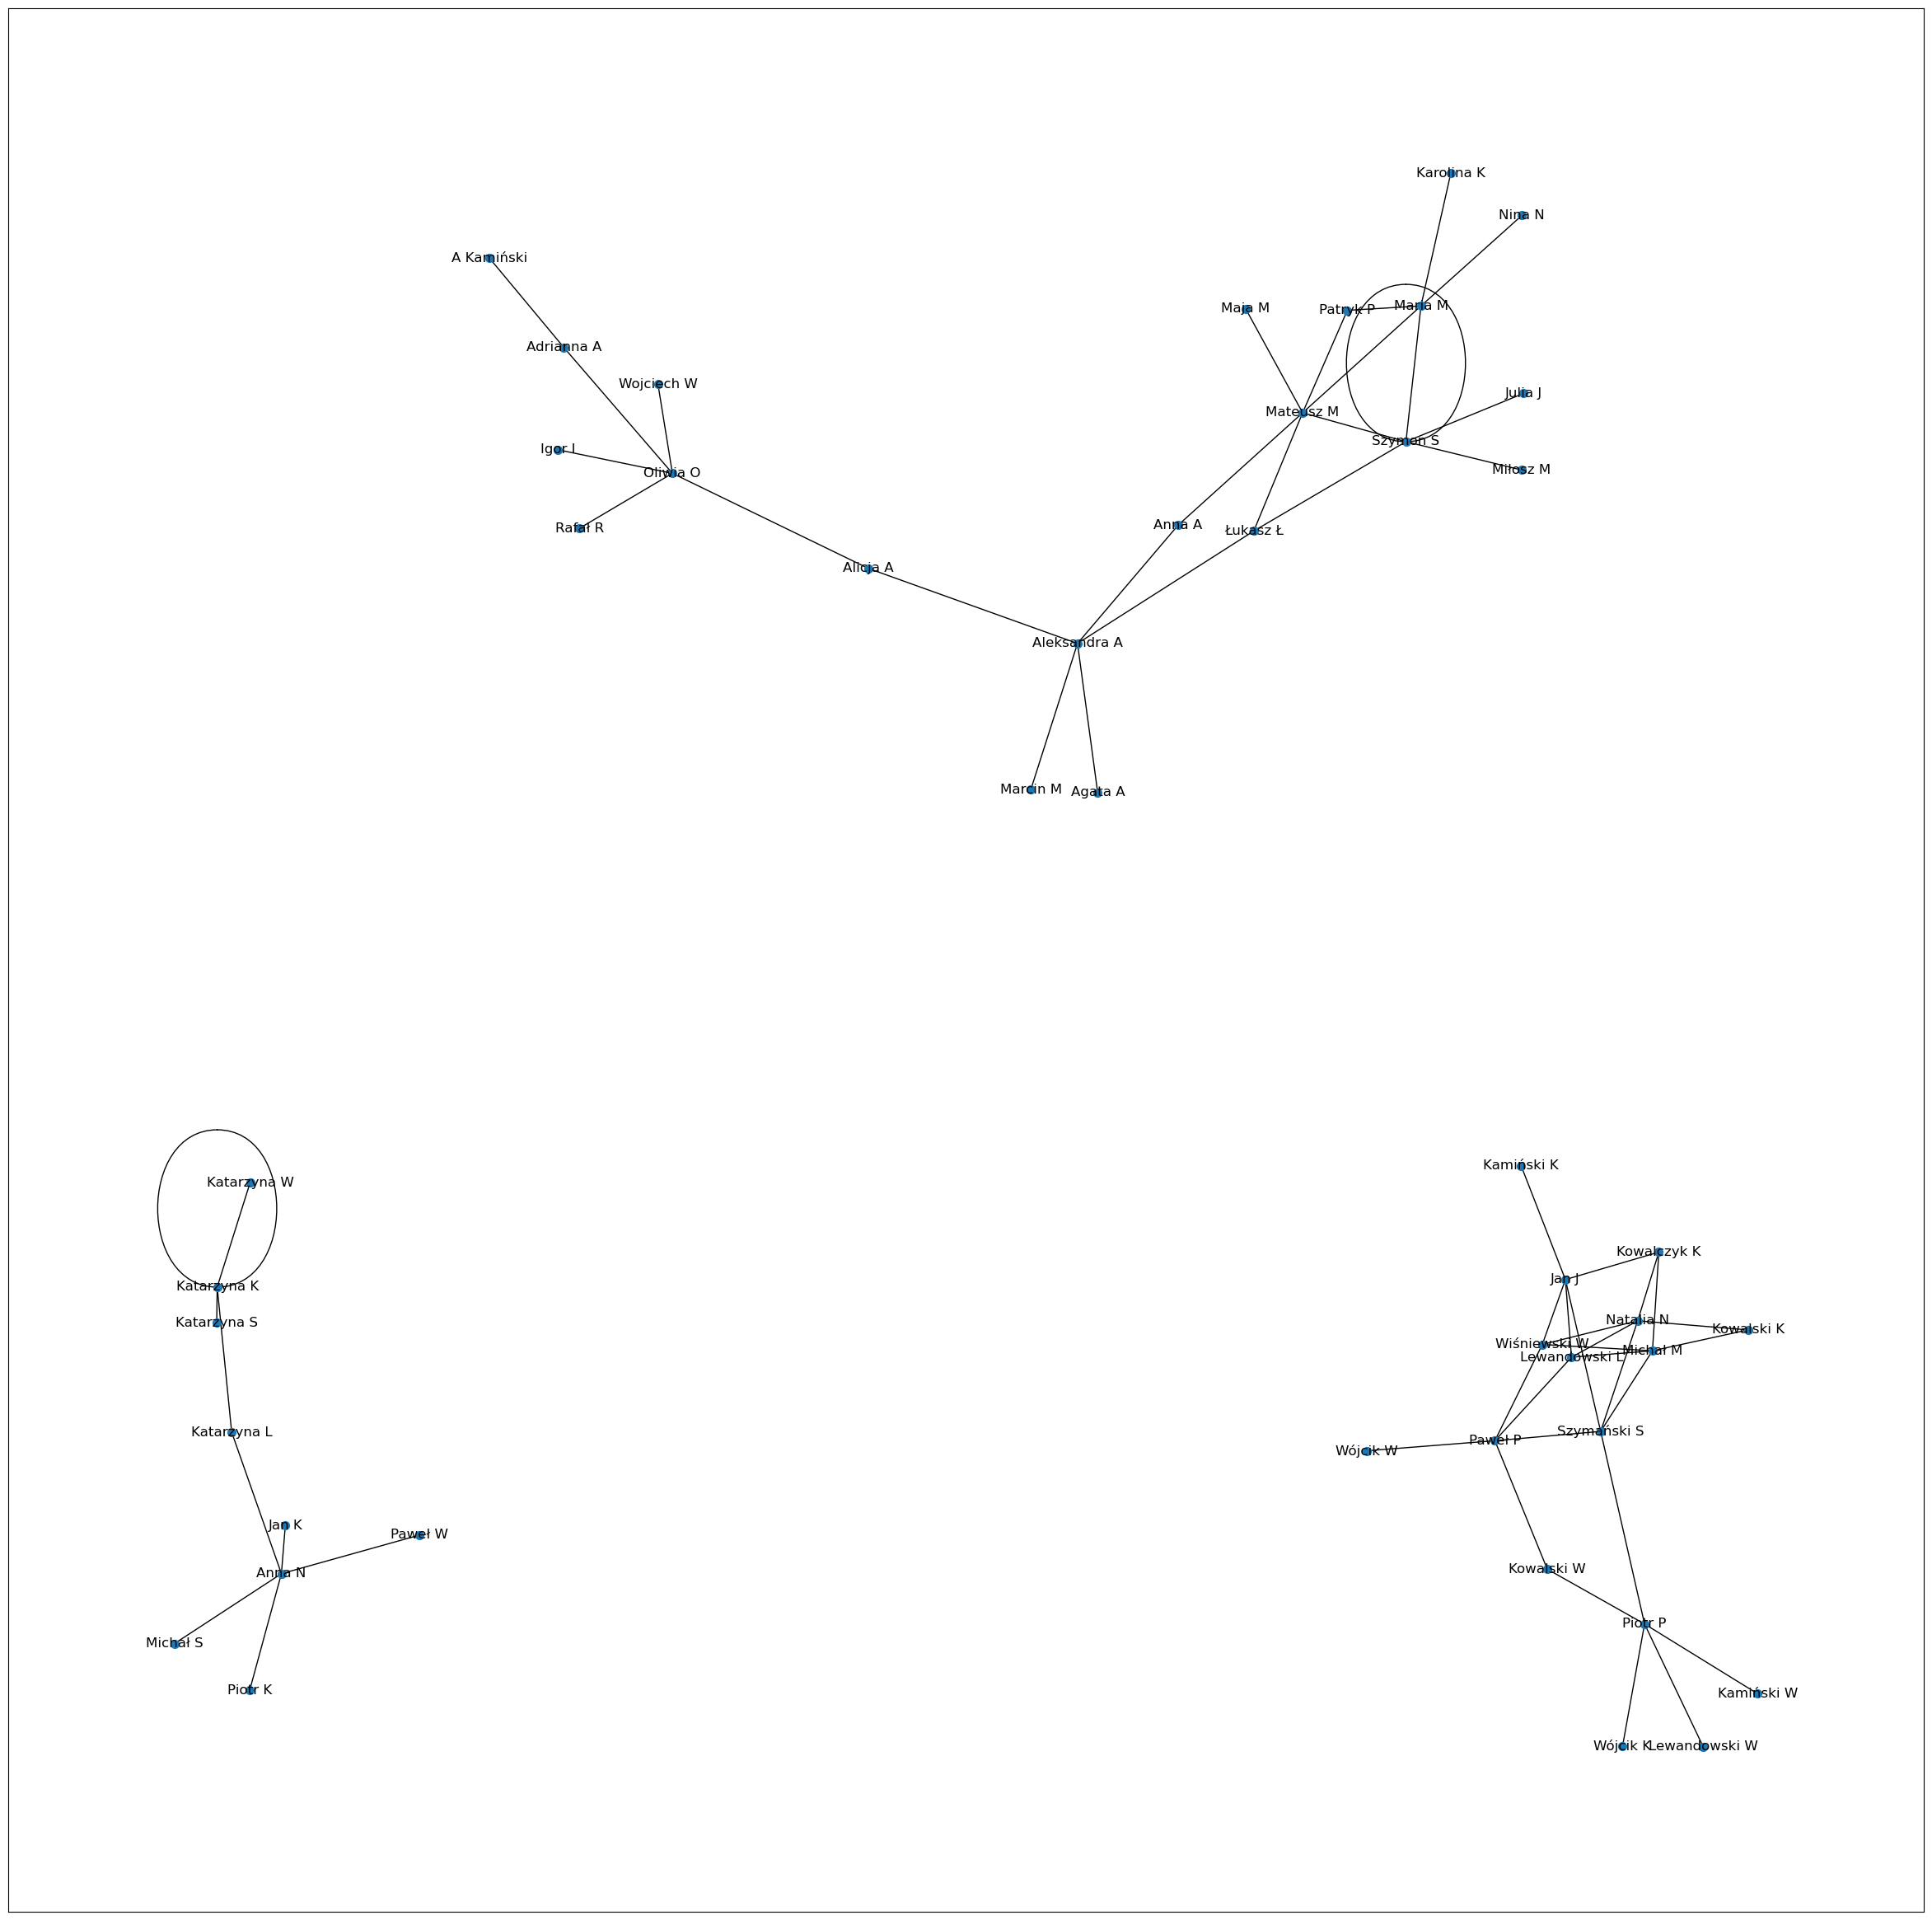

In [51]:
plt.figure(figsize = (30,30))
nx.draw_networkx(graph,with_labels=True,node_size = 50)
plt.savefig("map_0.png", format = "png", dpi = 300)
plt.show()


In [8]:
# prepare node position
m = Basemap(projection='merc',llcrnrlon=16,llcrnrlat=48.4,urcrnrlon=18.2,
urcrnrlat=55.6, lat_ts=0, resolution='l',suppress_ticks=True)
mx, my = m(airports['Współrzędna geograficzna (długość)'].values, airports['Współrzędna geograficzna (szerokość)'].values)
pos = {}
for count, elem in enumerate (airports['Imię']):
     pos[elem] = (mx[count], my[count])

KeyError: 'Współrzędna geograficzna (długość)'

In [9]:
graph.nodes

NodeView(('Anna K', 'Jan W', 'Katarzyna W', 'Maria K', 'Piotr M', 'Anna W', 'Katarzyna K', 'Piotr K', 'Jan K', 'Katarzyna M', 'Maria M', 'Piotr W', 'Maria W', 'Anna M', 'Maria N'))

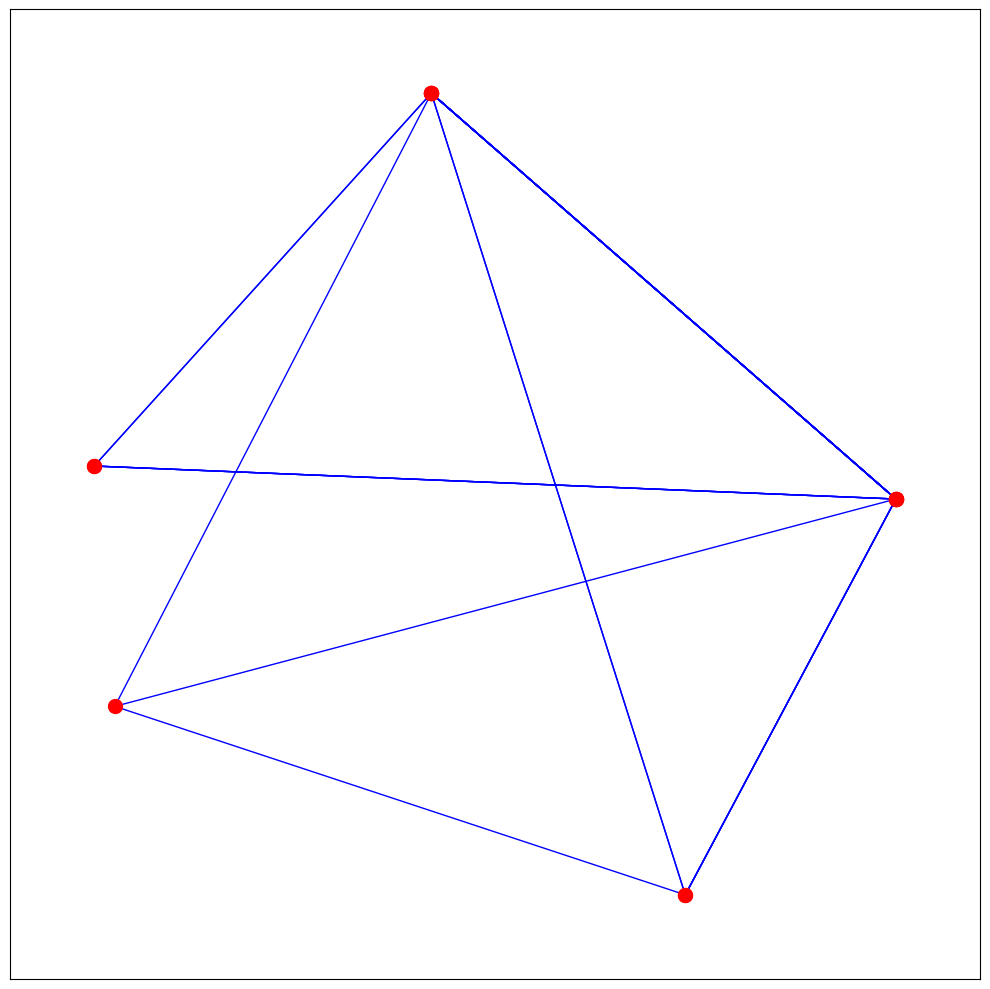

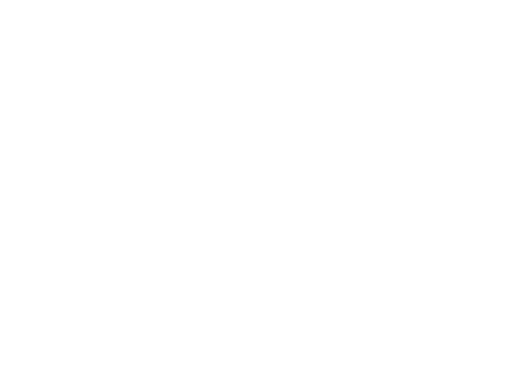

In [10]:
plt.figure(figsize = (10,10))
nx.draw_networkx(G = graph, pos = pos,with_labels=False,node_color = 'r',edge_color='b',alpha = 1, node_size = 100)




plt.tight_layout()
plt.savefig("map_1.png", format = "png", dpi = 300)
plt.show()
plt.axis('off');


In [11]:
start = input('Podaj stacje poczatkowa: ')
destination = input('Podaj stacje koncowa: ')

# start = 'Krakow'
# destination = 'Gdansk'

time = nx.shortest_path_length(graph, source=start, target=destination)
road = nx.shortest_path(graph, source=start, target=destination)

way = []
for i in range(len(road)):
    if i < len(road)-1:
        way.append((road[i],road[i+1]))

end = []
end.append(destination)

plt.figure(figsize = (10,10))
nx.draw_networkx(G = graph, pos = pos,with_labels=True,node_color = 'r',edge_color='y',alpha = 0.8, node_size = 100)
nx.draw_networkx_edges(G = graph, pos = pos, edgelist=way,width = 3, edge_color='b')
nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = end ,node_color = 'g',alpha = 0.8, node_size = 1000)

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
plt.tight_layout()
plt.savefig("map_1.png", format = "png", dpi = 300)
plt.show()
plt.axis('off')

print(list(road))
print("Najkrótsza droga to {} \nOdlegość między miastem {}, a miastem {} wynosi {} Minut.".format(road,start,destination,time))

Podaj stacje poczatkowa: z
Podaj stacje koncowa: z


NodeNotFound: Either source z or target z is not in G

In [8]:
graph.edges()

EdgeView([('Anna N', 'Katarzyna L'), ('Anna N', 'Piotr K'), ('Anna N', 'Paweł W'), ('Anna N', 'Michał S'), ('Anna N', 'Jan K'), ('Katarzyna L', 'Katarzyna K'), ('Katarzyna K', 'Katarzyna W'), ('Katarzyna K', 'Katarzyna K'), ('Katarzyna K', 'Katarzyna S'), ('Katarzyna K', 'Bartosz B'), ('Katarzyna K', 'Maciej M'), ('Piotr P', 'Lewandowski W'), ('Piotr P', 'Kowalski W'), ('Piotr P', 'Kamiński W'), ('Piotr P', 'Szymański S'), ('Piotr P', 'Wójcik K'), ('Piotr P', 'Bartosz B'), ('Piotr P', 'Ola O'), ('Piotr P', 'Zuzanna Z'), ('Piotr P', 'Kornelia K'), ('Kowalski W', 'Paweł P'), ('Szymański S', 'Paweł P'), ('Szymański S', 'Michał M'), ('Szymański S', 'Jan J'), ('Szymański S', 'Natalia N'), ('Paweł P', 'Wiśniewski W'), ('Paweł P', 'Wójcik W'), ('Paweł P', 'Lewandowski L'), ('Paweł P', 'Dominika D'), ('Wiśniewski W', 'Michał M'), ('Wiśniewski W', 'Jan J'), ('Wiśniewski W', 'Natalia N'), ('Lewandowski L', 'Michał M'), ('Lewandowski L', 'Jan J'), ('Lewandowski L', 'Natalia N'), ('Michał M', 'Kow

In [18]:
print (nx.info(graph))

Graph with 45 nodes and 58 edges


C:\Users\wlabl\AppData\Local\Temp\ipykernel_15996\944726865.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print (nx.info(graph))


In [19]:
graph.number_of_nodes()

45

In [20]:
graph.number_of_edges()

58

In [21]:
sorted(graph.degree, key=lambda x: x[1], reverse=True)

[('Szymon S', 7),
 ('Mateusz M', 6),
 ('Anna N', 5),
 ('Katarzyna K', 5),
 ('Piotr P', 5),
 ('Szymański S', 5),
 ('Paweł P', 5),
 ('Michał M', 5),
 ('Jan J', 5),
 ('Natalia N', 5),
 ('Aleksandra A', 5),
 ('Maria M', 5),
 ('Oliwia O', 5),
 ('Wiśniewski W', 4),
 ('Lewandowski L', 4),
 ('Kowalczyk K', 3),
 ('Łukasz Ł', 3),
 ('Katarzyna L', 2),
 ('Kowalski W', 2),
 ('Kowalski K', 2),
 ('Patryk P', 2),
 ('Anna A', 2),
 ('Alicja A', 2),
 ('Piotr K', 1),
 ('Paweł W', 1),
 ('Michał S', 1),
 ('Jan K', 1),
 ('Katarzyna W', 1),
 ('Katarzyna S', 1),
 ('Lewandowski W', 1),
 ('Kamiński W', 1),
 ('Wójcik K', 1),
 ('Wójcik W', 1),
 ('Kamiński K', 1),
 ('Maja M', 1),
 ('Agata A', 1),
 ('Marcin M', 1),
 ('Karolina K', 1),
 ('Nina N', 1),
 ('Julia J', 1),
 ('Miłosz M', 1),
 ('Adrianna A', 1),
 ('Wojciech W', 1),
 ('Igor I', 1),
 ('Rafał R', 1)]

In [67]:
G = nx.Graph([ ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")])
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_clustering(C))

0.0
0.0
0.09666666666666666


In [68]:
nx.average_clustering(graph)

0.042028985507246375

In [69]:
nx.global_efficiency(graph)

0.1559972394755006

In [25]:
list(graph.nodes)

['Anna N',
 'Katarzyna L',
 'Piotr K',
 'Paweł W',
 'Michał S',
 'Jan K',
 'Katarzyna K',
 'Katarzyna W',
 'Katarzyna S',
 'Piotr P',
 'Lewandowski W',
 'Kowalski W',
 'Kamiński W',
 'Szymański S',
 'Wójcik K',
 'Paweł P',
 'Wiśniewski W',
 'Wójcik W',
 'Lewandowski L',
 'Michał M',
 'Kowalczyk K',
 'Kowalski K',
 'Jan J',
 'Kamiński K',
 'Natalia N',
 'Mateusz M',
 'Łukasz Ł',
 'Szymon S',
 'Patryk P',
 'Anna A',
 'Maja M',
 'Aleksandra A',
 'Agata A',
 'Alicja A',
 'Marcin M',
 'Maria M',
 'Karolina K',
 'Nina N',
 'Julia J',
 'Miłosz M',
 'Oliwia O',
 'Adrianna A',
 'Wojciech W',
 'Igor I',
 'Rafał R']

In [26]:
import numpy as np
np.set_printoptions(linewidth=110)
A = nx.adjacency_matrix(graph)
print(A.todense())

C:\Users\wlabl\AppData\Local\Temp\ipykernel_15996\3929157849.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph)


[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
nx.degree_pearson_correlation_coefficient(graph)

-0.5101760176017602

In [28]:
G = nx.Graph([ ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")])
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.diameter(C))

4
4
7


In [29]:
nx.global_efficiency(graph)

0.15785473785473808

In [30]:
G = nx.Graph([ ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")])
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))

2.388888888888889
2.4583333333333335
3.405263157894737


In [31]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

In [56]:
G = nx.Graph([("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")])
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))

2.388888888888889
2.4583333333333335
3.405263157894737


NameError: name 'ax2' is not defined

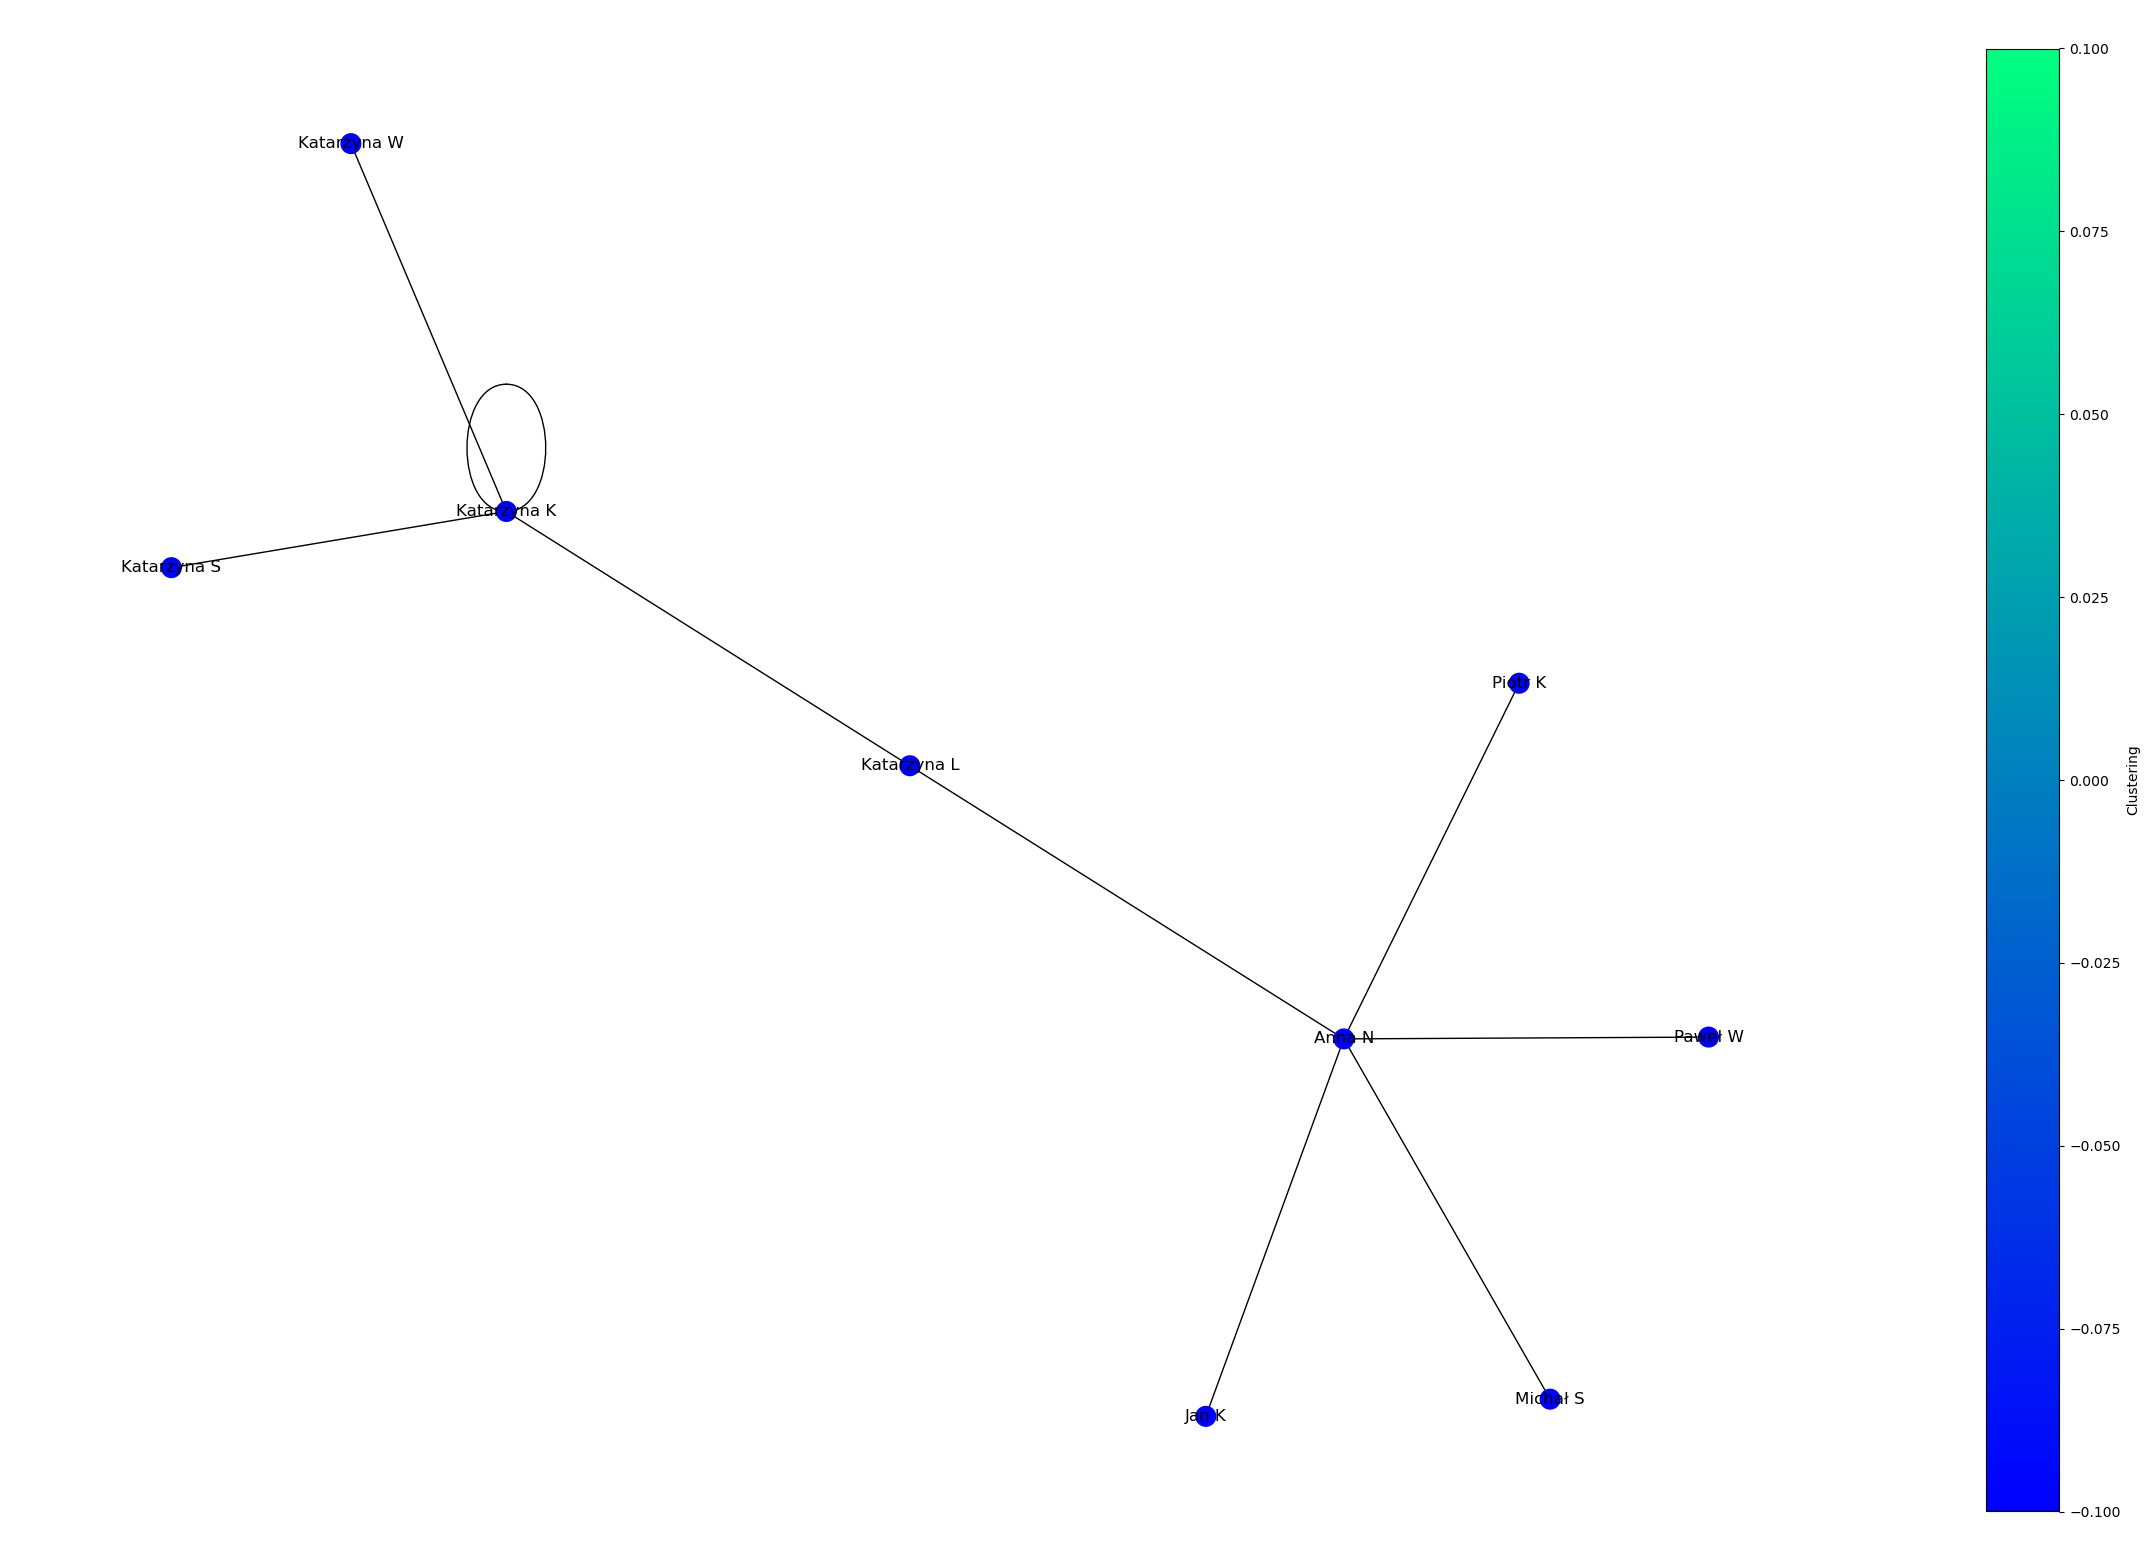

In [58]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

g = nx.Graph([("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")])
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.clustering(gc)

cmap = plt.get_cmap('winter')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1) = plt.subplots(ncols=1, figsize=(30, 20))
nx.draw_spring(gc, node_color=node_colors,node_size = 200, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [35]:
 network_graph = graph.gamma(network_graph, radius=3)

AttributeError: 'Graph' object has no attribute 'gamma'

In [59]:
nx.average_node_connectivity(graph, flow_func=None)

0.47342995169082125

In [37]:
nx.average_shortest_path_length(graph)

NetworkXError: Graph is not connected.

In [38]:
nx.diameter(graph, e=None, usebounds=False)

NetworkXError: Found infinite path length because the graph is not connected

In [39]:
G = nx.Graph([('Anna K', 'Jan W'), ('Anna K', 'Maria K'), ('Anna K', 'Piotr M'), ('Anna K', 'Katarzyna K'), ('Anna K', 'Katarzyna M'), ('Jan W', 'Katarzyna W'), ('Jan W', 'Piotr K'), ('Jan W', 'Piotr M'), ('Jan W', 'Maria W'), ('Jan W', 'Maria N'), ('Jan W', 'Katarzyna M'), ('Jan W', 'Piotr W'), ('Katarzyna W', 'Piotr M'), ('Katarzyna W', 'Jan K'), ('Katarzyna W', 'Anna W'), ('Maria K', 'Jan K'), ('Maria K', 'Piotr W'), ('Piotr M', 'Anna W'), ('Piotr M', 'Jan K'), ('Piotr M', 'Katarzyna M'), ('Anna W', 'Katarzyna K'), ('Anna W', 'Katarzyna M'), ('Anna W', 'Maria M'), ('Anna W', 'Jan K'), ('Anna W', 'Maria N'), ('Anna W', 'Piotr K'), ('Katarzyna K', 'Piotr K'), ('Piotr K', 'Maria M'), ('Piotr K', 'Piotr W'), ('Jan K', 'Katarzyna M'), ('Katarzyna M', 'Piotr W'), ('Piotr W', 'Anna M')])
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))

1.8571428571428572


In [41]:
nx.betweenness_centrality(graph, k=None, normalized=True, weight=None, endpoints=False, seed=None)

{'Anna N': 0.023255813953488372,
 'Katarzyna L': 0.015856236786469344,
 'Piotr K': 0.0,
 'Paweł W': 0.0,
 'Michał S': 0.0,
 'Jan K': 0.0,
 'Katarzyna K': 0.013742071881606767,
 'Katarzyna W': 0.0,
 'Katarzyna S': 0.0,
 'Piotr P': 0.04334038054968288,
 'Lewandowski W': 0.0,
 'Kowalski W': 0.005919661733615223,
 'Kamiński W': 0.0,
 'Szymański S': 0.0455602536997886,
 'Wójcik K': 0.0,
 'Paweł P': 0.026374207188160678,
 'Wiśniewski W': 0.007610993657505285,
 'Wójcik W': 0.0,
 'Lewandowski L': 0.007610993657505285,
 'Michał M': 0.01287878787878788,
 'Kowalczyk K': 0.0017970401691331927,
 'Kowalski K': 0.00021141649048625794,
 'Jan J': 0.020806906272022554,
 'Kamiński K': 0.0,
 'Natalia N': 0.01287878787878788,
 'Mateusz M': 0.05972515856236787,
 'Łukasz Ł': 0.06183932346723044,
 'Szymon S': 0.04809725158562368,
 'Patryk P': 0.0,
 'Anna A': 0.02378435517970402,
 'Maja M': 0.0,
 'Aleksandra A': 0.1072938689217759,
 'Agata A': 0.0,
 'Alicja A': 0.07399577167019028,
 'Marcin M': 0.0,
 'Maria M'

In [28]:
 nx.eigen_centrality = nx.eigenvector_centrality(graph)
 all_nodes = [(node,eigen_centrality(node)) for node in eigen_centrality]

NameError: name 'eigen_centrality' is not defined

In [29]:
nx.draw(graph, pos, nx.degree_centrality(graph), 'Degree Centrality')

TypeError: draw() takes from 1 to 3 positional arguments but 4 were given

In [30]:
nx.draw(graph, pos, nx.eigenvector_centrality(graph), 'Eigenvector Centrality')

TypeError: draw() takes from 1 to 3 positional arguments but 4 were given

In [31]:
nx.draw(graph, pos, nx.katz_centrality(graph, alpha=0.1, beta=1.0), 'Katz Centrality')

TypeError: draw() takes from 1 to 3 positional arguments but 4 were given

In [32]:
nx.draw(graph, pos, nx.betweenness_centrality(graph), 'Betweenness Centrality')

TypeError: draw() takes from 1 to 3 positional arguments but 4 were given

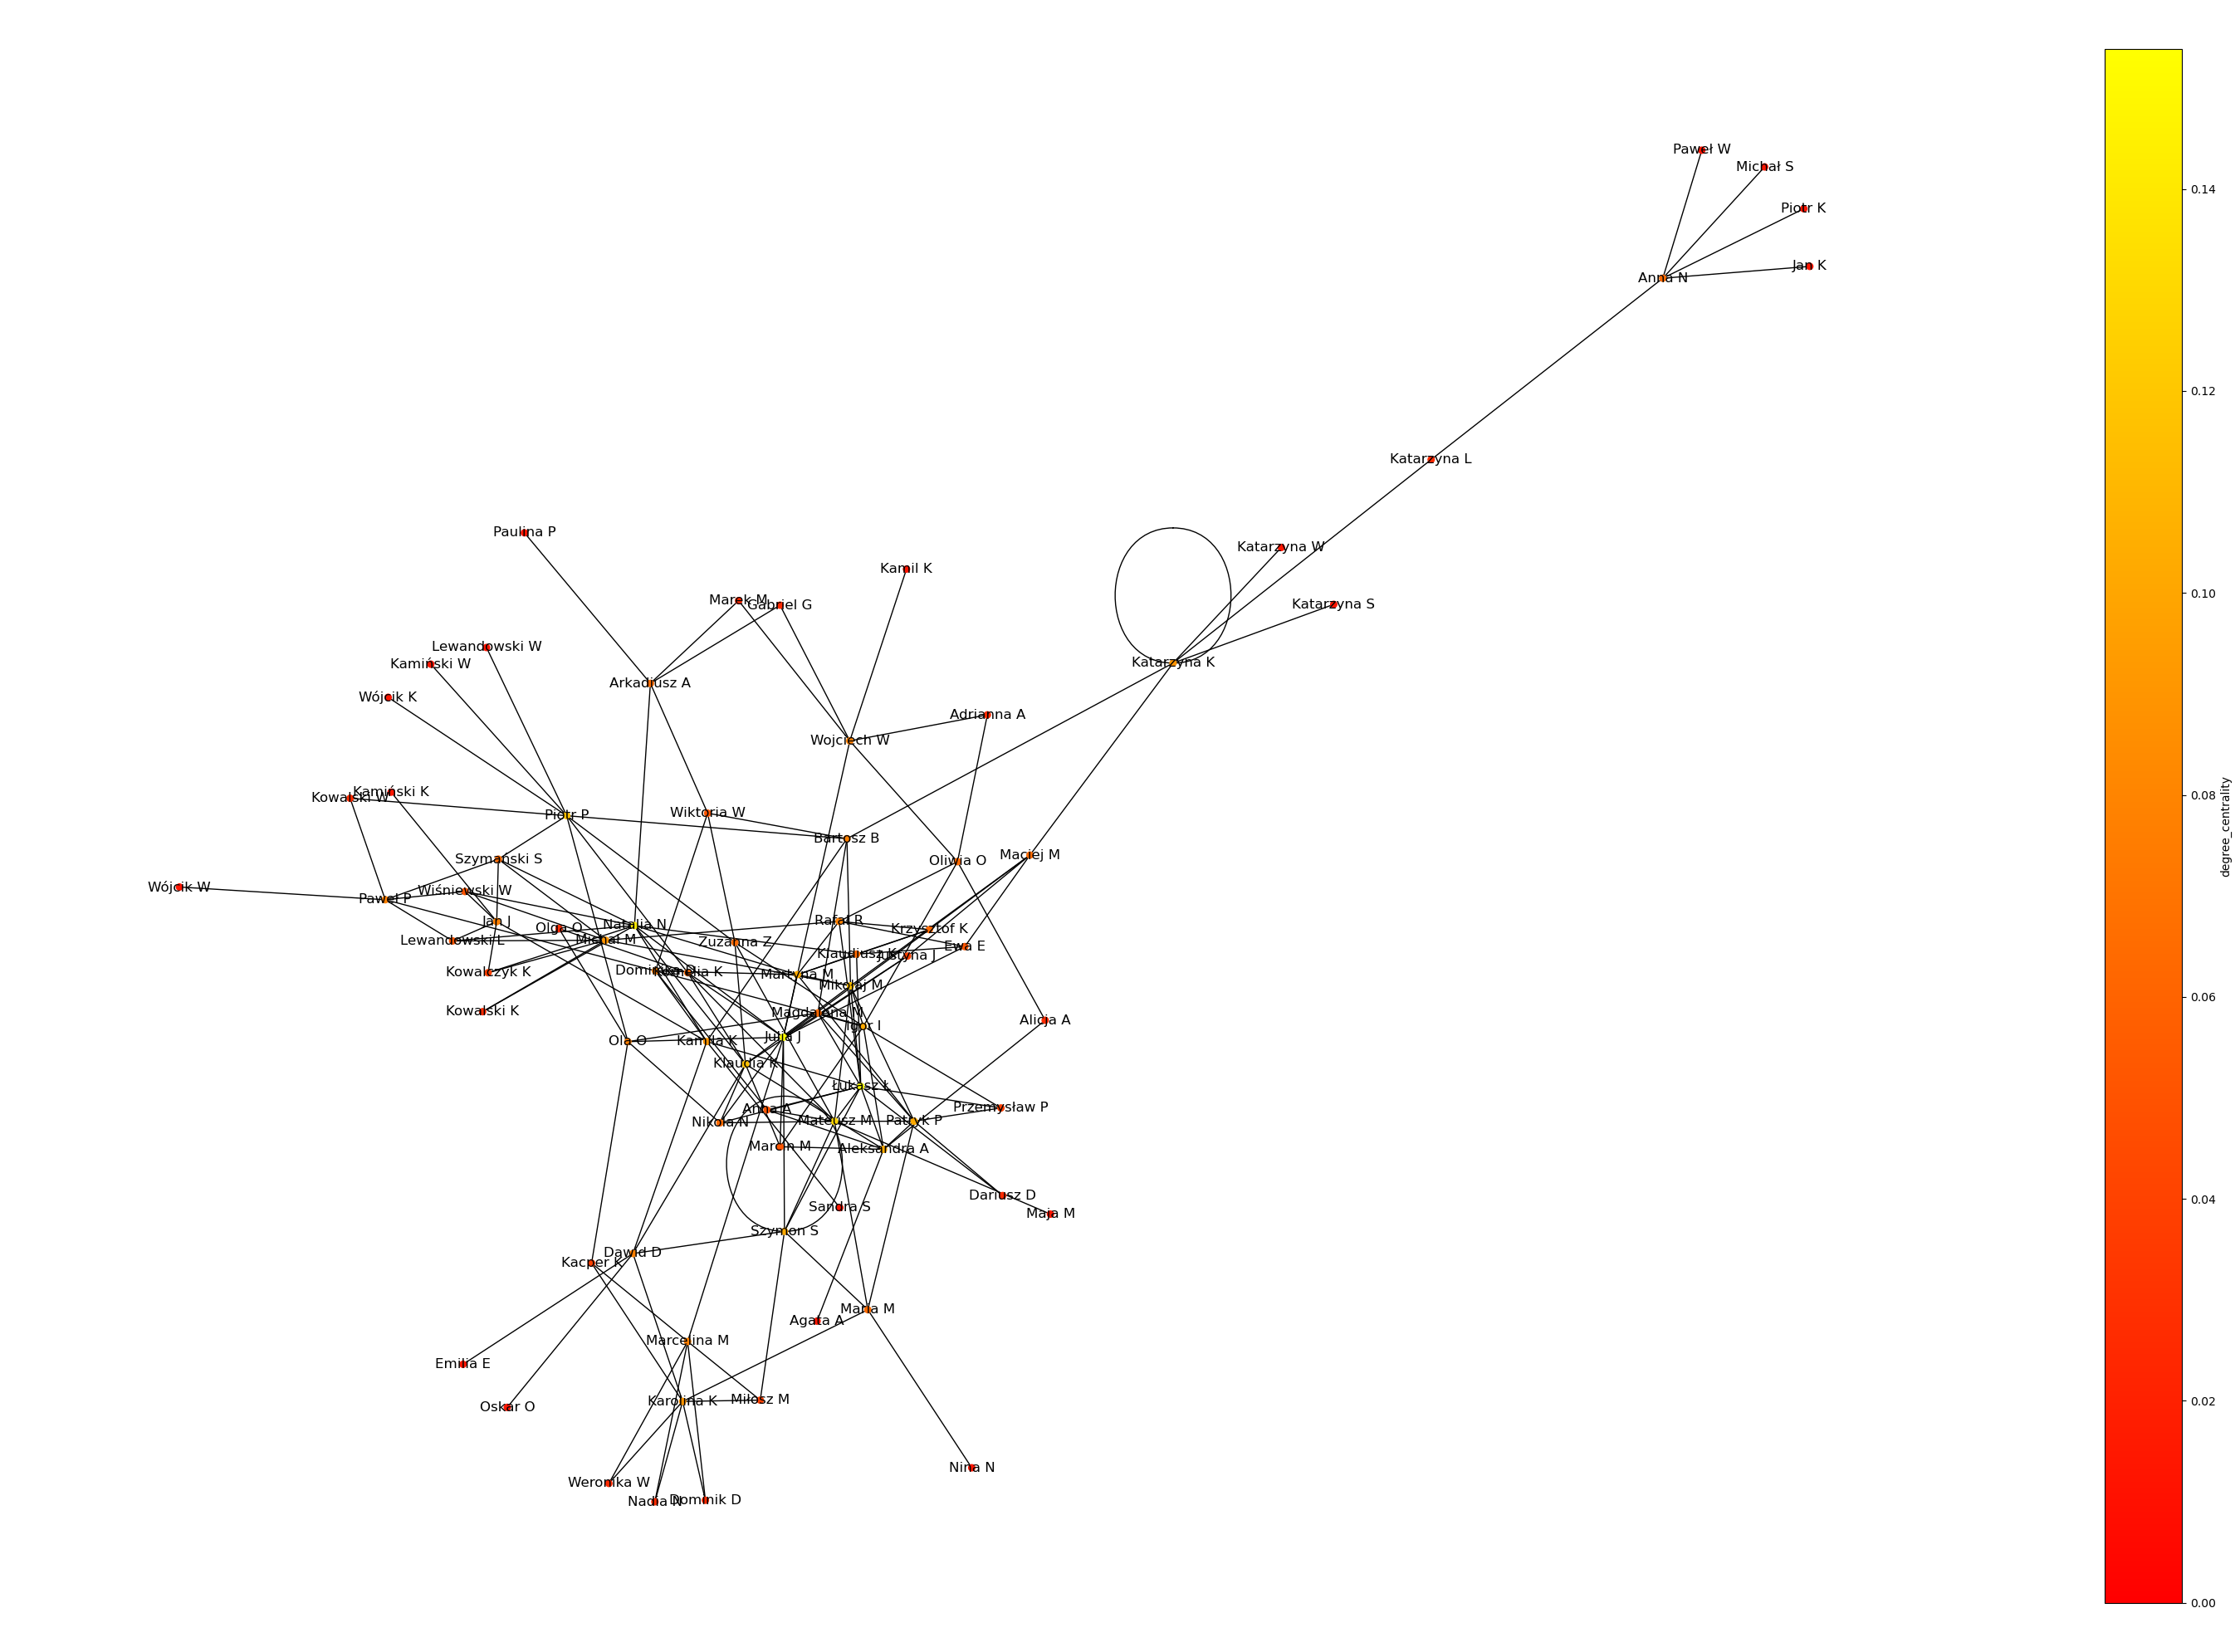

In [27]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

g = nx.Graph([('Anna N', 'Katarzyna L'), ('Anna N', 'Piotr K'), ('Anna N', 'Paweł W'), ('Anna N', 'Michał S'), ('Anna N', 'Jan K'), ('Katarzyna L', 'Katarzyna K'), ('Katarzyna K', 'Katarzyna W'), ('Katarzyna K', 'Katarzyna K'), ('Katarzyna K', 'Katarzyna S'), ('Katarzyna K', 'Bartosz B'), ('Katarzyna K', 'Maciej M'), ('Piotr P', 'Lewandowski W'), ('Piotr P', 'Kowalski W'), ('Piotr P', 'Kamiński W'), ('Piotr P', 'Szymański S'), ('Piotr P', 'Wójcik K'), ('Piotr P', 'Bartosz B'), ('Piotr P', 'Ola O'), ('Piotr P', 'Zuzanna Z'), ('Piotr P', 'Kornelia K'), ('Kowalski W', 'Paweł P'), ('Szymański S', 'Paweł P'), ('Szymański S', 'Michał M'), ('Szymański S', 'Jan J'), ('Szymański S', 'Natalia N'), ('Paweł P', 'Wiśniewski W'), ('Paweł P', 'Wójcik W'), ('Paweł P', 'Lewandowski L'), ('Paweł P', 'Dominika D'), ('Wiśniewski W', 'Michał M'), ('Wiśniewski W', 'Jan J'), ('Wiśniewski W', 'Natalia N'), ('Lewandowski L', 'Michał M'), ('Lewandowski L', 'Jan J'), ('Lewandowski L', 'Natalia N'), ('Michał M', 'Kowalczyk K'), ('Michał M', 'Kowalski K'), ('Michał M', 'Mikołaj M'), ('Michał M', 'Rafał R'), ('Kowalczyk K', 'Jan J'), ('Kowalczyk K', 'Natalia N'), ('Kowalski K', 'Natalia N'), ('Jan J', 'Kamiński K'), ('Jan J', 'Kamila K'), ('Natalia N', 'Kamila K'), ('Natalia N', 'Julia J'), ('Natalia N', 'Klaudia K'), ('Natalia N', 'Arkadiusz A'), ('Natalia N', 'Klaudiusz K'), ('Natalia N', 'Martyna M'), ('Mateusz M', 'Łukasz Ł'), ('Mateusz M', 'Szymon S'), ('Mateusz M', 'Patryk P'), ('Mateusz M', 'Anna A'), ('Mateusz M', 'Maja M'), ('Mateusz M', 'Maria M'), ('Mateusz M', 'Mikołaj M'), ('Mateusz M', 'Nikola N'), ('Mateusz M', 'Zuzanna Z'), ('Mateusz M', 'Kornelia K'), ('Łukasz Ł', 'Aleksandra A'), ('Łukasz Ł', 'Szymon S'), ('Łukasz Ł', 'Mikołaj M'), ('Łukasz Ł', 'Nikola N'), ('Łukasz Ł', 'Anna A'), ('Łukasz Ł', 'Kamila K'), ('Łukasz Ł', 'Dariusz D'), ('Łukasz Ł', 'Magdalena M'), ('Łukasz Ł', 'Przemysław P'), ('Łukasz Ł', 'Rafał R'), ('Łukasz Ł', 'Klaudiusz K'), ('Szymon S', 'Maria M'), ('Szymon S', 'Julia J'), ('Szymon S', 'Szymon S'), ('Szymon S', 'Miłosz M'), ('Szymon S', 'Dawid D'), ('Patryk P', 'Maria M'), ('Patryk P', 'Dariusz D'), ('Patryk P', 'Magdalena M'), ('Patryk P', 'Przemysław P'), ('Patryk P', 'Aleksandra A'), ('Patryk P', 'Mikołaj M'), ('Patryk P', 'Martyna M'), ('Anna A', 'Aleksandra A'), ('Anna A', 'Dominika D'), ('Aleksandra A', 'Agata A'), ('Aleksandra A', 'Alicja A'), ('Aleksandra A', 'Marcin M'), ('Aleksandra A', 'Klaudia K'), ('Aleksandra A', 'Igor I'), ('Alicja A', 'Oliwia O'), ('Marcin M', 'Julia J'), ('Marcin M', 'Klaudia K'), ('Marcin M', 'Igor I'), ('Maria M', 'Karolina K'), ('Maria M', 'Nina N'), ('Karolina K', 'Dominik D'), ('Karolina K', 'Weronika W'), ('Karolina K', 'Miłosz M'), ('Karolina K', 'Nadia N'), ('Karolina K', 'Kacper K'), ('Karolina K', 'Dawid D'), ('Julia J', 'Wojciech W'), ('Julia J', 'Justyna J'), ('Julia J', 'Krzysztof K'), ('Julia J', 'Ewa E'), ('Julia J', 'Ola O'), ('Julia J', 'Nikola N'), ('Julia J', 'Kornelia K'), ('Julia J', 'Marcelina M'), ('Julia J', 'Martyna M'), ('Miłosz M', 'Marcelina M'), ('Oliwia O', 'Adrianna A'), ('Oliwia O', 'Wojciech W'), ('Oliwia O', 'Igor I'), ('Oliwia O', 'Rafał R'), ('Adrianna A', 'Wojciech W'), ('Wojciech W', 'Kamil K'), ('Wojciech W', 'Marek M'), ('Wojciech W', 'Gabriel G'), ('Igor I', 'Dominika D'), ('Igor I', 'Zuzanna Z'), ('Igor I', 'Magdalena M'), ('Igor I', 'Przemysław P'), ('Igor I', 'Mikołaj M'), ('Rafał R', 'Krzysztof K'), ('Rafał R', 'Ewa E'), ('Rafał R', 'Martyna M'), ('Marek M', 'Arkadiusz A'), ('Gabriel G', 'Arkadiusz A'), ('Dominik D', 'Marcelina M'), ('Weronika W', 'Marcelina M'), ('Nadia N', 'Marcelina M'), ('Kacper K', 'Ola O'), ('Kacper K', 'Marcelina M'), ('Bartosz B', 'Magdalena M'), ('Bartosz B', 'Mikołaj M'), ('Bartosz B', 'Wiktoria W'), ('Bartosz B', 'Kamila K'), ('Magdalena M', 'Ola O'), ('Mikołaj M', 'Martyna M'), ('Mikołaj M', 'Klaudia K'), ('Mikołaj M', 'Maciej M'), ('Wiktoria W', 'Dominika D'), ('Wiktoria W', 'Zuzanna Z'), ('Wiktoria W', 'Arkadiusz A'), ('Kamila K', 'Sandra S'), ('Kamila K', 'Dawid D'), ('Kamila K', 'Dominika D'), ('Dawid D', 'Emilia E'), ('Dawid D', 'Oskar O'), ('Dawid D', 'Klaudia K'), ('Klaudia K', 'Nikola N'), ('Klaudia K', 'Zuzanna Z'), ('Klaudia K', 'Justyna J'), ('Klaudia K', 'Kornelia K'), ('Dominika D', 'Martyna M'), ('Justyna J', 'Maciej M'), ('Krzysztof K', 'Maciej M'), ('Krzysztof K', 'Klaudiusz K'), ('Krzysztof K', 'Martyna M'), ('Ewa E', 'Maciej M'), ('Ewa E', 'Klaudiusz K'), ('Martyna M', 'Klaudiusz K'), ('Ola O', 'Olga O'), ('Ola O', 'Nikola N'), ('Olga O', 'Kornelia K'), ('Arkadiusz A', 'Paulina P')])
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.degree_centrality(gc)

cmap = plt.get_cmap('')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1) = plt.subplots(ncols=1, figsize=(30, 20))
nx.draw_spring(gc, node_color=node_colors, node_size=30,with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='degree_centrality', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('degree_centrality')
ax2.set_ylabel('Number of station')

plt.tight_layout()
plt.show()

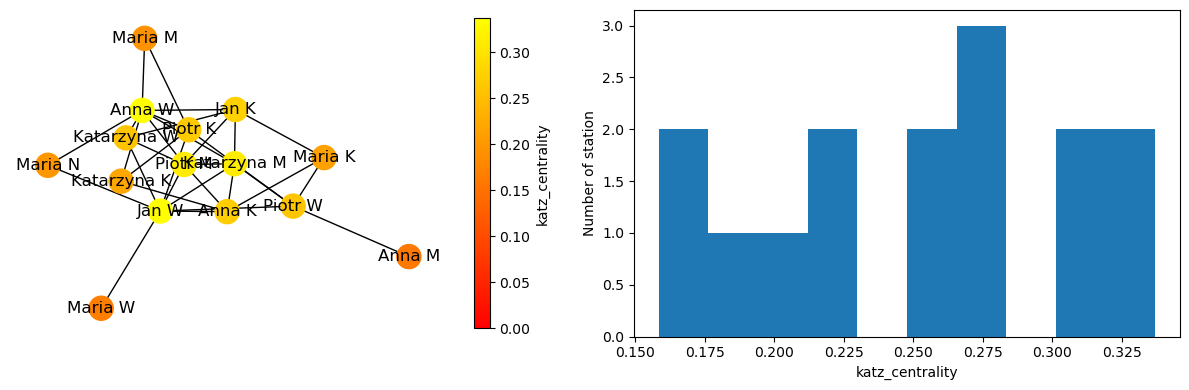

In [34]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

g = nx.Graph([('Anna K', 'Jan W'), ('Anna K', 'Maria K'), ('Anna K', 'Piotr M'), ('Anna K', 'Katarzyna K'), ('Anna K', 'Katarzyna M'), ('Jan W', 'Katarzyna W'), ('Jan W', 'Piotr K'), ('Jan W', 'Piotr M'), ('Jan W', 'Maria W'), ('Jan W', 'Maria N'), ('Jan W', 'Katarzyna M'), ('Jan W', 'Piotr W'), ('Katarzyna W', 'Piotr M'), ('Katarzyna W', 'Jan K'), ('Katarzyna W', 'Anna W'), ('Maria K', 'Jan K'), ('Maria K', 'Piotr W'), ('Piotr M', 'Anna W'), ('Piotr M', 'Jan K'), ('Piotr M', 'Katarzyna M'), ('Anna W', 'Katarzyna K'), ('Anna W', 'Katarzyna M'), ('Anna W', 'Maria M'), ('Anna W', 'Jan K'), ('Anna W', 'Maria N'), ('Anna W', 'Piotr K'), ('Katarzyna K', 'Piotr K'), ('Piotr K', 'Maria M'), ('Piotr K', 'Piotr W'), ('Jan K', 'Katarzyna M'), ('Katarzyna M', 'Piotr W'), ('Piotr W', 'Anna M')])
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.katz_centrality(gc)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='katz_centrality', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('katz_centrality')
ax2.set_ylabel('Number of station')

plt.tight_layout()
plt.show()

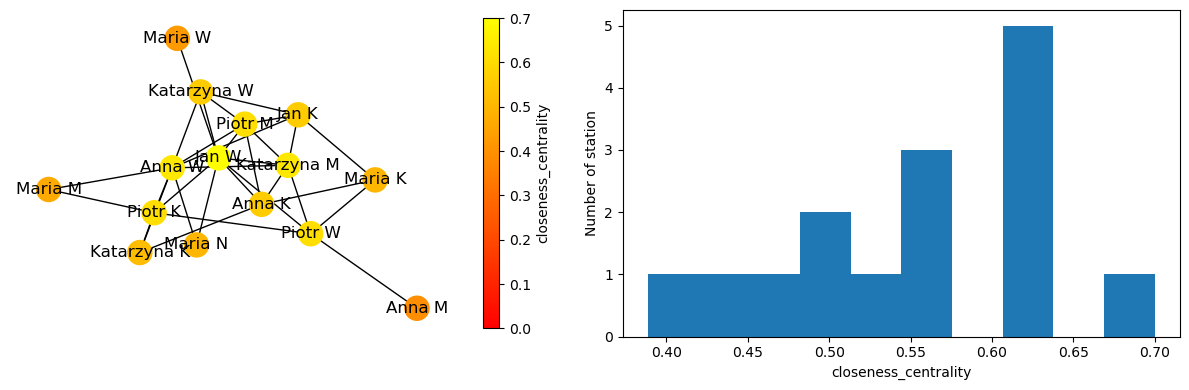

In [35]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

g = nx.Graph([('Anna K', 'Jan W'), ('Anna K', 'Maria K'), ('Anna K', 'Piotr M'), ('Anna K', 'Katarzyna K'), ('Anna K', 'Katarzyna M'), ('Jan W', 'Katarzyna W'), ('Jan W', 'Piotr K'), ('Jan W', 'Piotr M'), ('Jan W', 'Maria W'), ('Jan W', 'Maria N'), ('Jan W', 'Katarzyna M'), ('Jan W', 'Piotr W'), ('Katarzyna W', 'Piotr M'), ('Katarzyna W', 'Jan K'), ('Katarzyna W', 'Anna W'), ('Maria K', 'Jan K'), ('Maria K', 'Piotr W'), ('Piotr M', 'Anna W'), ('Piotr M', 'Jan K'), ('Piotr M', 'Katarzyna M'), ('Anna W', 'Katarzyna K'), ('Anna W', 'Katarzyna M'), ('Anna W', 'Maria M'), ('Anna W', 'Jan K'), ('Anna W', 'Maria N'), ('Anna W', 'Piotr K'), ('Katarzyna K', 'Piotr K'), ('Piotr K', 'Maria M'), ('Piotr K', 'Piotr W'), ('Jan K', 'Katarzyna M'), ('Katarzyna M', 'Piotr W'), ('Piotr W', 'Anna M')])
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.closeness_centrality(gc)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='closeness_centrality', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('closeness_centrality')
ax2.set_ylabel('Number of station')

plt.tight_layout()
plt.show()

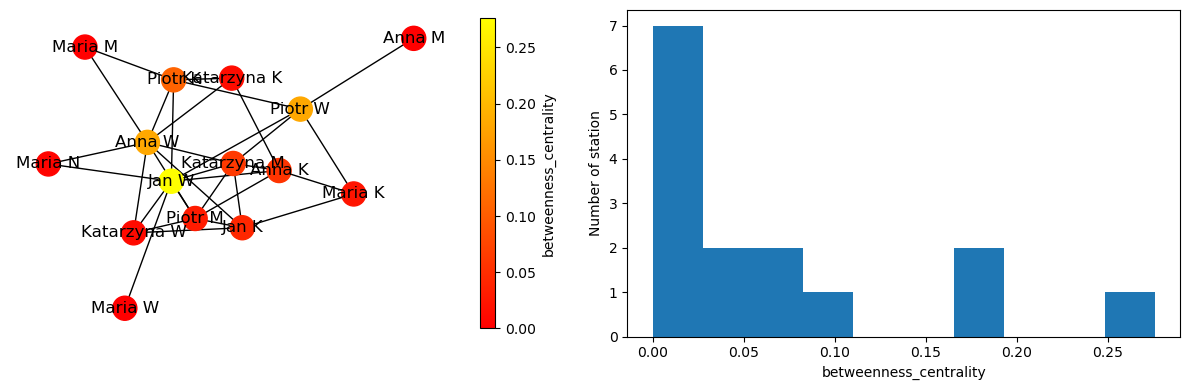

In [36]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

g = nx.Graph([('Anna K', 'Jan W'), ('Anna K', 'Maria K'), ('Anna K', 'Piotr M'), ('Anna K', 'Katarzyna K'), ('Anna K', 'Katarzyna M'), ('Jan W', 'Katarzyna W'), ('Jan W', 'Piotr K'), ('Jan W', 'Piotr M'), ('Jan W', 'Maria W'), ('Jan W', 'Maria N'), ('Jan W', 'Katarzyna M'), ('Jan W', 'Piotr W'), ('Katarzyna W', 'Piotr M'), ('Katarzyna W', 'Jan K'), ('Katarzyna W', 'Anna W'), ('Maria K', 'Jan K'), ('Maria K', 'Piotr W'), ('Piotr M', 'Anna W'), ('Piotr M', 'Jan K'), ('Piotr M', 'Katarzyna M'), ('Anna W', 'Katarzyna K'), ('Anna W', 'Katarzyna M'), ('Anna W', 'Maria M'), ('Anna W', 'Jan K'), ('Anna W', 'Maria N'), ('Anna W', 'Piotr K'), ('Katarzyna K', 'Piotr K'), ('Piotr K', 'Maria M'), ('Piotr K', 'Piotr W'), ('Jan K', 'Katarzyna M'), ('Katarzyna M', 'Piotr W'), ('Piotr W', 'Anna M')])
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.betweenness_centrality(gc)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='betweenness_centrality', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('betweenness_centrality')
ax2.set_ylabel('Number of station')

plt.tight_layout()
plt.show()

In [37]:
nx.to_pandas_adjacency(graph)

Anna K  Jan W  Katarzyna W  Maria K  Piotr M  Anna W  \
Anna K          0.0    1.0          0.0      1.0      1.0     0.0   
Jan W           1.0    0.0          1.0      0.0      1.0     0.0   
Katarzyna W     0.0    1.0          0.0      0.0      1.0     1.0   
Maria K         1.0    0.0          0.0      0.0      0.0     0.0   
Piotr M         1.0    1.0          1.0      0.0      0.0     1.0   
Anna W          0.0    0.0          1.0      0.0      1.0     0.0   
Katarzyna K     1.0    0.0          0.0      0.0      0.0     1.0   
Piotr K         0.0    1.0          0.0      0.0      0.0     1.0   
Jan K           0.0    0.0          1.0      1.0      1.0     1.0   
Katarzyna M     1.0    1.0          0.0      0.0      1.0     1.0   
Maria M         0.0    0.0          0.0      0.0      0.0     1.0   
Piotr W         0.0    1.0          0.0      1.0      0.0     0.0   
Maria W         0.0    1.0          0.0      0.0      0.0     0.0   
Anna M          0.0    0.0          0.0      0.0      0.0     0.0   
Maria N         0.0    1.0          0.0      0.0      0.0     1.0   

             Katarzyna K  Piotr K  Jan K  Katarzyna M  Maria M  Piotr W  \
Anna K               1.0      0.0    0.0          1.0      0.0      0.0   
Jan W                0.0      1.0    0.0          1.0      0.0      1.0   
Katarzyna W          0.0      0.0    1.0          0.0      0.0      0.0   
Maria K              0.0      0.0    1.0          0.0      0.0      1.0   
Piotr M              0.0      0.0    1.0          1.0      0.0      0.0   
Anna W               1.0      1.0    1.0          1.0      1.0      0.0   
Katarzyna K          0.0      1.0    0.0          0.0      0.0      0.0   
Piotr K              1.0      0.0    0.0          0.0      1.0      1.0   
Jan K                0.0      0.0    0.0          1.0      0.0      0.0   
Katarzyna M          0.0      0.0    1.0          0.0      0.0      1.0   
Maria M              0.0      1.0    0.0          0.0      0.0      0.0   
Piotr W              0.0      1.0    0.0          1.0      0.0      0.0   
Maria W              0.0      0.0    0.0          0.0      0.0      0.0   
Anna M               0.0      0.0    0.0          0.0      0.0      1.0   
Maria N              0.0      0.0    0.0          0.0      0.0      0.0   

             Maria W  Anna M  Maria N  
Anna K           0.0     0.0      0.0  
Jan W            1.0     0.0      1.0  
Katarzyna W      0.0     0.0      0.0  
Maria K          0.0     0.0      0.0  
Piotr M          0.0     0.0      0.0  
Anna W           0.0     0.0      1.0  
Katarzyna K      0.0     0.0      0.0  
Piotr K          0.0     0.0      0.0  
Jan K            0.0     0.0      0.0  
Katarzyna M      0.0     0.0      0.0  
Maria M          0.0     0.0      0.0  
Piotr W          0.0     1.0      0.0  
Maria W          0.0     0.0      0.0  
Anna M           0.0     0.0      0.0  
Maria N          0.0     0.0      0.0

C:\Users\wlabl\anaconda3\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


<AxesSubplot:>

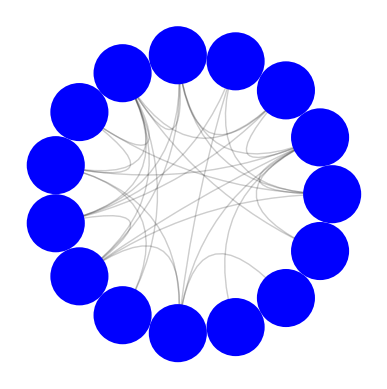

In [38]:
import nxviz as nv
nv.circos(graph)

In [39]:
nx.average_degree_connectivity(graph)

{5: 5.1, 8: 4.1875, 4: 6.75, 3: 5.5, 6: 6.083333333333333, 2: 7.25, 1: 6.5}

In [40]:
nx.average_shortest_path_length(graph)

1.8571428571428572

In [41]:
G = nx.Graph([('Vorosmarty square M1 ', 'Deak Square M1'), ('Deak Square M1', 'Bajcsy-Zsilinszky Way M1  '), ('Deak Square M1', 'Arany Janos street M3 '), ('Deak Square M1', 'Ferenciek tere M3 '), ('Bajcsy-Zsilinszky Way M1  ', 'Opera M1  '), ('Opera M1  ', 'Oktogon Square M1  '), ('Oktogon Square M1  ', 'Vorosmarty street M1  '), ('Vorosmarty street M1  ', 'Kodaly korond M1  '), ('Kodaly korond M1  ', 'Bajza street M1  '), ('Bajza street M1  ', 'Szechenyi Bath M1  '), ('Szechenyi Bath M1  ', 'Heroes Square M1  '), ('Heroes Square M1  ', 'Mexikoi Way M1  '), ('Deli M2 ', 'Szall Kalman Square M2 '), ('Szall Kalman Square M2 ', 'Batthyany Square M2 '), ('Batthyany Square M2 ', 'Kossuth Square M2 '), ('Kossuth Square M2 ', 'Astoria square M2 '), ('Astoria square M2 ', 'Blaha Square M2 '), ('Blaha Square M2 ', 'Keleti M2 '), ('Keleti M2 ', 'Stadionok M2 '), ('Stadionok M2 ', 'Pillango street M2 '), ('Pillango street M2 ', 'Ors Vezer Square M2 '), ('Ujpest-Kozpont M3 ', 'Ujpest-Varoskapu M3 '), ('Ujpest-Varoskapu M3 ', 'Gyongyosi street  M3 '), ('Gyongyosi street  M3 ', 'Forgach street  M3 '), ('Forgach street  M3 ', 'Arpad Bridge M3 '), ('Arpad Bridge M3 ', 'Dozsa Gyorgy Way M3 '), ('Dozsa Gyorgy Way M3 ', 'Lehel square  M3 '), ('Lehel square  M3 ', 'Nyugati M3 '), ('Nyugati M3 ', 'Arany Janos street M3 '), ('Ferenciek tere M3 ', 'Corvin-negyed M3  '), ('Corvin-negyed M3  ', 'Klinikak M3 '), ('Klinikak M3 ', 'Nagyvarad square M3 '), ('Nagyvarad square M3 ', 'Nepliget M3 '), ('Nepliget M3 ', 'Ecseri road M3 '), ('Ecseri road M3 ', 'Pottyos utca M3 '), ('Pottyos utca M3 ', 'Hatar Way M3 '), ('Hatar Way M3 ', 'Kobanya-Kispest M3 '), ('Kelenfold Train Station M4 ', 'Bikas Park M4 '), ('Bikas Park M4 ', 'Ujbuda Center M4 '), ('Ujbuda Center M4 ', 'Moricz Zsigmond korter M4 '), ('Moricz Zsigmond korter M4 ', 'Szent Gellert Square M4 '), ('Szent Gellert Square M4 ', 'Fovam Square M4 '), ('Fovam Square M4 ', 'Kalvin Square M4 '), ('Kalvin Square M4 ', 'Rakoczi Square M4 '), ('Rakoczi Square M4 ', 'II. Janos Pal Papa Square M4 '), ('II. Janos Pal Papa Square M4 ', 'Keleti Train Station M4 ')])
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))

7.605911330049261
3.6666666666666665
3.6666666666666665


In [42]:
nx.density(graph)

0.3047619047619048

In [43]:
nx.global_efficiency(graph)

0.6253968253968251

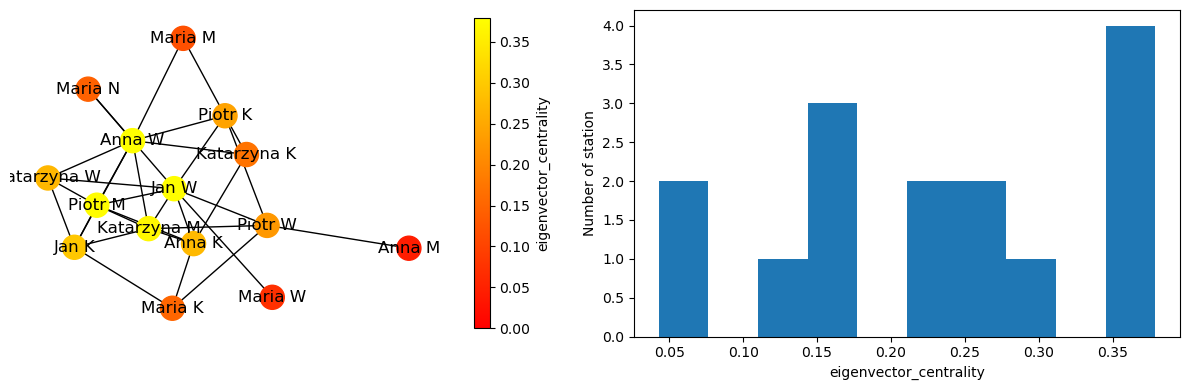

In [44]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

g = nx.Graph([('Anna K', 'Jan W'), ('Anna K', 'Maria K'), ('Anna K', 'Piotr M'), ('Anna K', 'Katarzyna K'), ('Anna K', 'Katarzyna M'), ('Jan W', 'Katarzyna W'), ('Jan W', 'Piotr K'), ('Jan W', 'Piotr M'), ('Jan W', 'Maria W'), ('Jan W', 'Maria N'), ('Jan W', 'Katarzyna M'), ('Jan W', 'Piotr W'), ('Katarzyna W', 'Piotr M'), ('Katarzyna W', 'Jan K'), ('Katarzyna W', 'Anna W'), ('Maria K', 'Jan K'), ('Maria K', 'Piotr W'), ('Piotr M', 'Anna W'), ('Piotr M', 'Jan K'), ('Piotr M', 'Katarzyna M'), ('Anna W', 'Katarzyna K'), ('Anna W', 'Katarzyna M'), ('Anna W', 'Maria M'), ('Anna W', 'Jan K'), ('Anna W', 'Maria N'), ('Anna W', 'Piotr K'), ('Katarzyna K', 'Piotr K'), ('Piotr K', 'Maria M'), ('Piotr K', 'Piotr W'), ('Jan K', 'Katarzyna M'), ('Katarzyna M', 'Piotr W'), ('Piotr W', 'Anna M')])
gc = g.subgraph(max(nx.connected_components(g)))
lcc = nx.eigenvector_centrality(gc)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='eigenvector_centrality', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('eigenvector_centrality')
ax2.set_ylabel('Number of station')

plt.tight_layout()
plt.show()

In [45]:
nx.louvain_communities(graph, resolution=1, threshold=1e-07, seed=None)

AttributeError: module networkx has no attribute louvain_communities

In [53]:
import networkx as nx
G = nx.petersen_graph()
nx.community.louvain_communities(G, seed=123)
[('Anna K', 'Jan W'), ('Anna K', 'Maria K'), ('Anna K', 'Piotr M'), ('Anna K', 'Katarzyna K'), ('Anna K', 'Katarzyna M'), ('Jan W', 'Katarzyna W'), ('Jan W', 'Piotr K'), ('Jan W', 'Piotr M'), ('Jan W', 'Maria W'), ('Jan W', 'Maria N'), ('Jan W', 'Katarzyna M'), ('Jan W', 'Piotr W'), ('Katarzyna W', 'Piotr M'), ('Katarzyna W', 'Jan K'), ('Katarzyna W', 'Anna W'), ('Maria K', 'Jan K'), ('Maria K', 'Piotr W'), ('Piotr M', 'Anna W'), ('Piotr M', 'Jan K'), ('Piotr M', 'Katarzyna M'), ('Anna W', 'Katarzyna K'), ('Anna W', 'Katarzyna M'), ('Anna W', 'Maria M'), ('Anna W', 'Jan K'), ('Anna W', 'Maria N'), ('Anna W', 'Piotr K'), ('Katarzyna K', 'Piotr K'), ('Piotr K', 'Maria M'), ('Piotr K', 'Piotr W'), ('Jan K', 'Katarzyna M'), ('Katarzyna M', 'Piotr W'), ('Piotr W', 'Anna M')]

[('Anna K', 'Jan W'),
 ('Anna K', 'Maria K'),
 ('Anna K', 'Piotr M'),
 ('Anna K', 'Katarzyna K'),
 ('Anna K', 'Katarzyna M'),
 ('Jan W', 'Katarzyna W'),
 ('Jan W', 'Piotr K'),
 ('Jan W', 'Piotr M'),
 ('Jan W', 'Maria W'),
 ('Jan W', 'Maria N'),
 ('Jan W', 'Katarzyna M'),
 ('Jan W', 'Piotr W'),
 ('Katarzyna W', 'Piotr M'),
 ('Katarzyna W', 'Jan K'),
 ('Katarzyna W', 'Anna W'),
 ('Maria K', 'Jan K'),
 ('Maria K', 'Piotr W'),
 ('Piotr M', 'Anna W'),
 ('Piotr M', 'Jan K'),
 ('Piotr M', 'Katarzyna M'),
 ('Anna W', 'Katarzyna K'),
 ('Anna W', 'Katarzyna M'),
 ('Anna W', 'Maria M'),
 ('Anna W', 'Jan K'),
 ('Anna W', 'Maria N'),
 ('Anna W', 'Piotr K'),
 ('Katarzyna K', 'Piotr K'),
 ('Piotr K', 'Maria M'),
 ('Piotr K', 'Piotr W'),
 ('Jan K', 'Katarzyna M'),
 ('Katarzyna M', 'Piotr W'),
 ('Piotr W', 'Anna M')]

In [46]:
import community as community_louvain
>>> import networkx as nx
>>> G = nx.erdos_renyi_graph(100, 0.01)
>>> partion = community_louvain.best_partition(G)

In [65]:
>>> # display a graph with its communities:
>>> # as Erdos-Renyi graphs don't have true community structure,
>>> # instead load the karate club graph
>>> import community as community_louvain
>>> import matplotlib.cm as cm
>>> import matplotlib.pyplot as plt
>>> import networkx as nx
>>> 
g = nx.Graph([("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")
])
>>> # compute the best partition
>>> partition = community_louvain.best_partition(g)

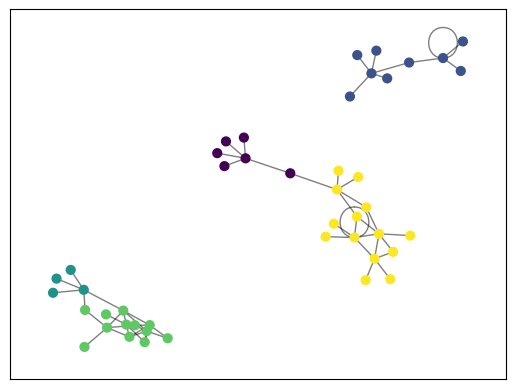

In [66]:
>>> # draw the graph
>>> pos = nx.spring_layout(g)
>>> # color the nodes according to their partition
>>> cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
>>> nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=40,  
>>>                        cmap=cmap, node_color=list(partition.values()))
>>> nx.draw_networkx_edges(g, pos,  alpha=0.5)
>>> plt.show()

In [61]:
import networkx as nx
import math

def calculate_entropy(probabilities):
    entropy = -sum(p * math.log2(p) for p in probabilities if p != 0)
    return entropy

def main():
    # Create a sample graph using NetworkX
    G = nx.Graph()
    G.add_edges_from([("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")
])

    # Calculate probabilities for each node's degree
    degree_probabilities = [G.degree(node) / len(G) for node in G.nodes()]

    # Calculate entropy based on node degrees
    entropy = calculate_entropy(degree_probabilities)
    print(f"Entropy of the graph: {entropy}")

    # Perform additional analysis using NetworkX or Shannon's Information Theory concepts

if __name__ == "__main__":
    main()

Entropy of the graph: 9.703952877608451


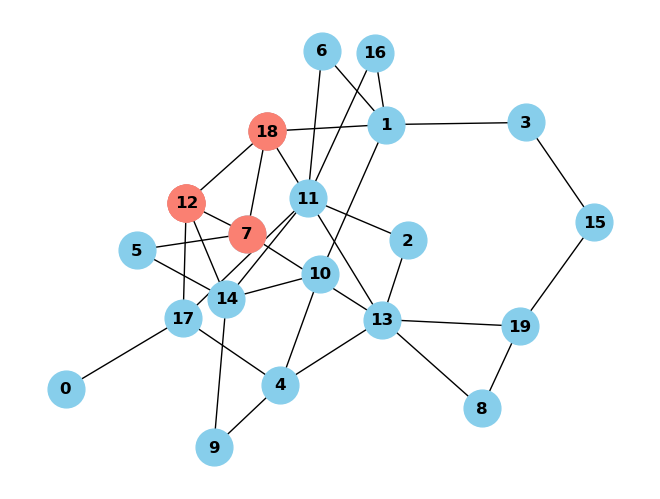

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def random_walk(graph, start_node, num_steps):
    current_node = start_node
    visited_nodes = [current_node]

    for _ in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        if not neighbors:
            break  # Break if the current node has no neighbors

        next_node = random.choice(neighbors)
        visited_nodes.append(next_node)
        current_node = next_node

    return visited_nodes

def visualize_graph(graph, path):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', font_weight='bold', node_size=700)
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='salmon', node_size=700)
    plt.show()

def main():
    # Create a sample graph
    G = nx.erdos_renyi_graph(20, 0.2)

    # Choose a starting node for the random walk
    start_node = random.choice(list(G.nodes))

    # Simulate information flow through a random walk
    num_steps = 5
    path = random_walk(G, start_node, num_steps)

    # Visualize the graph with the path of the random walk highlighted
    visualize_graph(G, path)

if __name__ == "__main__":
    main()

In [31]:
nx.node_redundancy(G, nodes=None)

AttributeError: module networkx has no attribute node_redundancy

In [41]:
from itertools import combinations

import networkx as nx
from networkx import NetworkXError

__all__ = ["node_redundancy"]

In [45]:
import networkx as nx

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wagami (pojemnościami)
G.add_edge("Źródło", "A", capacity=3)
G.add_edge("Źródło", "B", capacity=2)
G.add_edge("A", "C", capacity=3)
G.add_edge("B", "C", capacity=2)
G.add_edge("B", "Koniec", capacity=1)
G.add_edge("C", "Koniec", capacity=3)

# Obliczanie maksymalnego przepływu
max_flow_value, max_flow_dict = nx.maximum_flow(G, "Źródło", "Koniec")

print("Maksymalny przepływ:", max_flow_value)
print("Przepływ przez krawędzie:", max_flow_dict)

Maksymalny przepływ: 4
Przepływ przez krawędzie: {'Źródło': {'A': 2, 'B': 2}, 'A': {'C': 2}, 'B': {'C': 1, 'Koniec': 1}, 'C': {'Koniec': 3}, 'Koniec': {}}


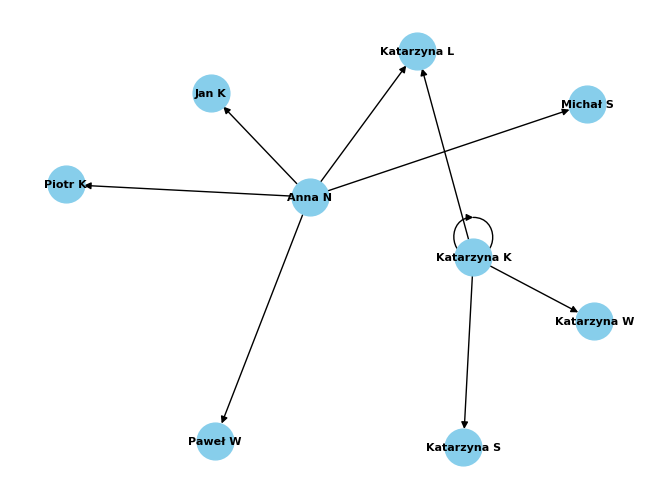

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    # Dodaj pozostałe połączenia
]

G.add_edges_from(edges)

# Rysowanie grafu
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8, arrowsize=10)

# Wyświetlanie grafu
plt.show()

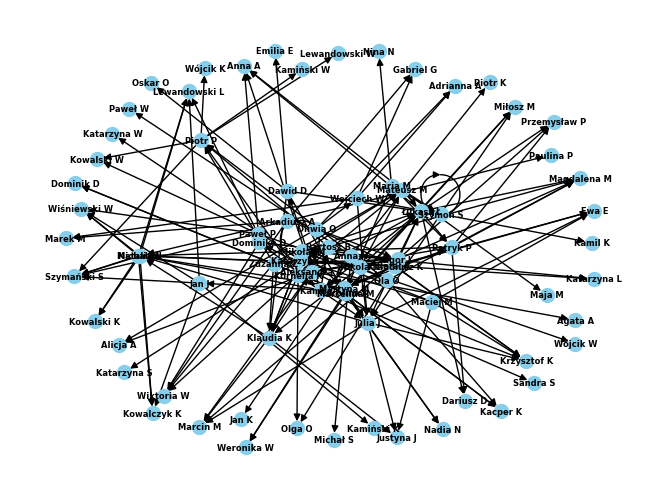

<Figure size 5000x5000 with 0 Axes>

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
    ("Wojciech W", "Kamil K"),
    ("Wojciech W", "Adrianna A"),
    ("Wojciech W", "Marek M"),
    ("Wojciech W", "Gabriel G"),
    ("Wojciech W", "Julia J"),
    ("Karolina K", "Dominik D"),
    ("Karolina K", "Weronika W"),
    ("Karolina K", "Miłosz M"),
    ("Karolina K", "Nadia N"),
    ("Karolina K", "Kacper K"),
    ("Bartosz B", "Magdalena M"),
    ("Bartosz B", "Mikołaj M"),
    ("Bartosz B", "Wiktoria W"),
    ("Bartosz B", "Piotr P"),
    ("Bartosz B", "Katarzyna K"),
    ("Kamila K", "Jan J"),
    ("Kamila K", "Natalia N"),
    ("Kamila K", "Bartosz B"),
    ("Kamila K", "Sandra S"),
    ("Kamila K", "Dawid D"),
    ("Dawid D", "Emilia E"),
    ("Dawid D", "Szymon S"),
    ("Dawid D", "Karolina K"),
    ("Dawid D", "Oskar O"),
    ("Dawid D", "Klaudia K"),
    ("Dominika D", "Paweł P"),
    ("Dominika D", "Wiktoria W"),
    ("Dominika D", "Igor I"),
    ("Dominika D", "Anna A"),
    ("Dominika D", "Kamila K"),
    ("Patryk P", "Dariusz D"),
    ("Patryk P", "Magdalena M"),
    ("Patryk P", "Przemysław P"),
    ("Patryk P", "Aleksandra A"),
    ("Patryk P", "Mikołaj M"),
    ("Julia J", "Justyna J"),
    ("Julia J", "Marcin M"),
    ("Julia J", "Natalia N"),
    ("Julia J", "Krzysztof K"),
    ("Julia J", "Ewa E"),
    ("Mikołaj M", "Łukasz Ł"),
    ("Mikołaj M", "Martyna M"),
    ("Mikołaj M", "Michał M"),
    ("Mikołaj M", "Klaudia K"),
    ("Mikołaj M", "Mateusz M"),
    ("Ola O", "Julia J"),
    ("Ola O", "Piotr P"),
    ("Ola O", "Olga O"),
    ("Ola O", "Kacper K"),
    ("Ola O", "Magdalena M"),
    ("Maciej M", "Mikołaj M"),
    ("Maciej M", "Justyna J"),
    ("Maciej M", "Katarzyna K"),
    ("Maciej M", "Krzysztof K"),
    ("Maciej M", "Ewa E"),
    ("Nikola N", "Łukasz Ł"),
    ("Nikola N", "Klaudia K"),
    ("Nikola N", "Mateusz M"),
    ("Nikola N", "Julia J"),
    ("Nikola N", "Ola O"),
    ("Zuzanna Z", "Klaudia K"),
    ("Zuzanna Z", "Mateusz M"),
    ("Zuzanna Z", "Piotr P"),
    ("Zuzanna Z", "Wiktoria W"),
    ("Zuzanna Z", "Igor I"),
    ("Łukasz Ł", "Anna A"),
    ("Łukasz Ł", "Kamila K"),
    ("Łukasz Ł", "Dariusz D"),
    ("Łukasz Ł", "Magdalena M"),
    ("Łukasz Ł", "Przemysław P"),
    ("Klaudia K", "Aleksandra A"),
    ("Klaudia K", "Mikołaj M"),
    ("Klaudia K", "Justyna J"),
    ("Klaudia K", "Marcin M"),
    ("Klaudia K", "Natalia N"),
    ("Rafał R", "Krzysztof K"),
    ("Rafał R", "Ewa E"),
    ("Rafał R", "Łukasz Ł"),
    ("Rafał R", "Martyna M"),
    ("Rafał R", "Michał M"),
    ("Kornelia K", "Klaudia K"),
    ("Kornelia K", "Mateusz M"),
    ("Kornelia K", "Julia J"),
    ("Kornelia K", "Piotr P"),
    ("Kornelia K", "Olga O"),
    ("Arkadiusz A", "Natalia N"),
    ("Arkadiusz A", "Paulina P"),
    ("Arkadiusz A", "Wiktoria W"),
    ("Arkadiusz A", "Marek M"),
    ("Arkadiusz A", "Gabriel G"),
    ("Marcelina M", "Julia J"),
    ("Marcelina M", "Dominik D"),
    ("Marcelina M", "Weronika W"),
    ("Marcelina M", "Miłosz M"),
    ("Marcelina M", "Nadia N"),
    ("Marcelina M", "Kacper K"),
    ("Igor I", "Magdalena M"),
    ("Igor I", "Przemysław P"),
    ("Igor I", "Aleksandra A"),
    ("Igor I", "Mikołaj M"),
    ("Igor I", "Marcin M"),
    ("Klaudiusz K", "Natalia N"),
    ("Klaudiusz K", "Krzysztof K"),
    ("Klaudiusz K", "Ewa E"),
    ("Klaudiusz K", "Łukasz Ł"),
    ("Klaudiusz K", "Martyna M"),
    ("Martyna M", "Dominika D"),
    ("Martyna M", "Patryk P"),
    ("Martyna M", "Julia J"),
    ("Martyna M", "Natalia N"),
    ("Martyna M", "Krzysztof K"),
]

G.add_edges_from(edges)

# Rysowanie grafu
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=100, node_color='skyblue', font_color='black', font_size=6, arrowsize=10)
plt.figure(figsize = (50,50))
# Wyświetlanie grafu
plt.show()

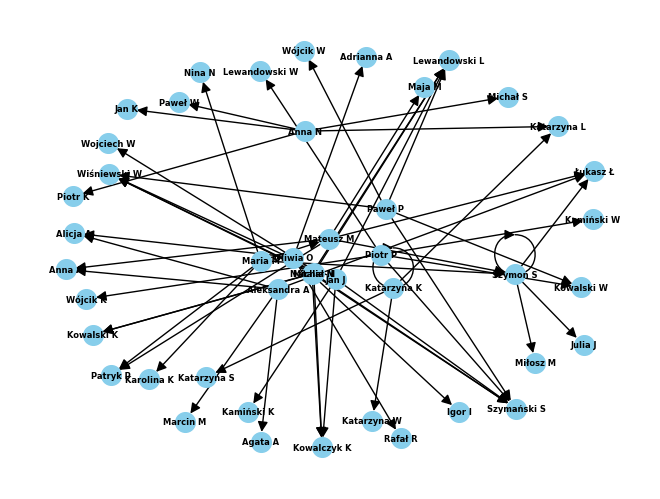

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),

]



G.add_edges_from(edges)

# Dodawanie pojemności 1 dla każdej krawędzi
for edge in G.edges:
    G[edge[0]][edge[1]]['capacity'] = 1

# Rysowanie grafu z większymi wierzchołkami
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', font_color='black', font_size=6, arrowsize=15)

# Wyświetlanie grafu
plt.show()

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
    ("Wojciech W", "Kamil K"),
    ("Wojciech W", "Adrianna A"),
    ("Wojciech W", "Marek M"),
    ("Wojciech W", "Gabriel G"),
    ("Wojciech W", "Julia J"),
    ("Karolina K", "Dominik D"),
    ("Karolina K", "Weronika W"),
    ("Karolina K", "Miłosz M"),
    ("Karolina K", "Nadia N"),
    ("Karolina K", "Kacper K"),
    ("Bartosz B", "Magdalena M"),
    ("Bartosz B", "Mikołaj M"),
    ("Bartosz B", "Wiktoria W"),
    ("Bartosz B", "Piotr P"),
    ("Bartosz B", "Katarzyna K"),
    ("Kamila K", "Jan J"),
    ("Kamila K", "Natalia N"),
    ("Kamila K", "Bartosz B"),
    ("Kamila K", "Sandra S"),
    ("Kamila K", "Dawid D"),
    ("Dawid D", "Emilia E"),
    ("Dawid D", "Szymon S"),
    ("Dawid D", "Karolina K"),
    ("Dawid D", "Oskar O"),
    ("Dawid D", "Klaudia K"),
    ("Dominika D", "Paweł P"),
    ("Dominika D", "Wiktoria W"),
    ("Dominika D", "Igor I"),
    ("Dominika D", "Anna A"),
    ("Dominika D", "Kamila K"),
    ("Patryk P", "Dariusz D"),
    ("Patryk P", "Magdalena M"),
    ("Patryk P", "Przemysław P"),
    ("Patryk P", "Aleksandra A"),
    ("Patryk P", "Mikołaj M"),
    ("Julia J", "Justyna J"),
    ("Julia J", "Marcin M"),
    ("Julia J", "Natalia N"),
    ("Julia J", "Krzysztof K"),
    ("Julia J", "Ewa E"),
    ("Mikołaj M", "Łukasz Ł"),
    ("Mikołaj M", "Martyna M"),
    ("Mikołaj M", "Michał M"),
    ("Mikołaj M", "Klaudia K"),
    ("Mikołaj M", "Mateusz M"),
    ("Ola O", "Julia J"),
    ("Ola O", "Piotr P"),
    ("Ola O", "Olga O"),
    ("Ola O", "Kacper K"),
    ("Ola O", "Magdalena M"),
    ("Maciej M", "Mikołaj M"),
    ("Maciej M", "Justyna J"),
    ("Maciej M", "Katarzyna K"),
    ("Maciej M", "Krzysztof K"),
    ("Maciej M", "Ewa E"),
    ("Nikola N", "Łukasz Ł"),
    ("Nikola N", "Klaudia K"),
    ("Nikola N", "Mateusz M"),
    ("Nikola N", "Julia J"),
    ("Nikola N", "Ola O"),
    ("Zuzanna Z", "Klaudia K"),
    ("Zuzanna Z", "Mateusz M"),
    ("Zuzanna Z", "Piotr P"),
    ("Zuzanna Z", "Wiktoria W"),
    ("Zuzanna Z", "Igor I"),
    ("Łukasz Ł", "Anna A"),
    ("Łukasz Ł", "Kamila K"),
    ("Łukasz Ł", "Dariusz D"),
    ("Łukasz Ł", "Magdalena M"),
    ("Łukasz Ł", "Przemysław P"),
    ("Klaudia K", "Aleksandra A"),
    ("Klaudia K", "Mikołaj M"),
    ("Klaudia K", "Justyna J"),
    ("Klaudia K", "Marcin M"),
    ("Klaudia K", "Natalia N"),
    ("Rafał R", "Krzysztof K"),
    ("Rafał R", "Ewa E"),
    ("Rafał R", "Łukasz Ł"),
    ("Rafał R", "Martyna M"),
    ("Rafał R", "Michał M"),
    ("Kornelia K", "Klaudia K"),
    ("Kornelia K", "Mateusz M"),
    ("Kornelia K", "Julia J"),
    ("Kornelia K", "Piotr P"),
    ("Kornelia K", "Olga O"),
    ("Arkadiusz A", "Natalia N"),
    ("Arkadiusz A", "Paulina P"),
    ("Arkadiusz A", "Wiktoria W"),
    ("Arkadiusz A", "Marek M"),
    ("Arkadiusz A", "Gabriel G"),
    ("Marcelina M", "Julia J"),
    ("Marcelina M", "Dominik D"),
    ("Marcelina M", "Weronika W"),
    ("Marcelina M", "Miłosz M"),
    ("Marcelina M", "Nadia N"),
    ("Marcelina M", "Kacper K"),
    ("Igor I", "Magdalena M"),
    ("Igor I", "Przemysław P"),
    ("Igor I", "Aleksandra A"),
    ("Igor I", "Mikołaj M"),
    ("Igor I", "Marcin M"),
    ("Klaudiusz K", "Natalia N"),
    ("Klaudiusz K", "Krzysztof K"),
    ("Klaudiusz K", "Ewa E"),
    ("Klaudiusz K", "Łukasz Ł"),
    ("Klaudiusz K", "Martyna M"),
    ("Martyna M", "Dominika D"),
    ("Martyna M", "Patryk P"),
    ("Martyna M", "Julia J"),
    ("Martyna M", "Natalia N"),
    ("Martyna M", "Krzysztof K"),
]

G.add_edges_from(edges)

# Dodawanie pojemności 1 dla każdej krawędzi
for edge in G.edges:
    G[edge[0]][edge[1]]['capacity'] = 1

# Obliczanie maksymalnego przepływu
source = "Anna N"
sink = "Natalia N"
max_flow_value, max_flow_dict = nx.maximum_flow(G, source, sink)

print("Maksymalny przepływ:", max_flow_value)
print("Przepływ przez krawędzie:", max_flow_dict)

Maksymalny przepływ: 0
Przepływ przez krawędzie: {'Anna N': {'Katarzyna L': 0, 'Piotr K': 0, 'Paweł W': 0, 'Michał S': 0, 'Jan K': 0}, 'Katarzyna L': {}, 'Piotr K': {}, 'Paweł W': {}, 'Michał S': {}, 'Jan K': {}, 'Katarzyna K': {'Katarzyna W': 0, 'Katarzyna L': 0, 'Katarzyna K': 0, 'Katarzyna S': 0}, 'Katarzyna W': {}, 'Katarzyna S': {}, 'Piotr P': {'Lewandowski W': 0, 'Kowalski W': 0, 'Kamiński W': 0, 'Szymański S': 0, 'Wójcik K': 0}, 'Lewandowski W': {}, 'Kowalski W': {}, 'Kamiński W': {}, 'Szymański S': {}, 'Wójcik K': {}, 'Paweł P': {'Wiśniewski W': 0, 'Kowalski W': 0, 'Wójcik W': 0, 'Szymański S': 0, 'Lewandowski L': 0}, 'Wiśniewski W': {}, 'Wójcik W': {}, 'Lewandowski L': {}, 'Michał M': {'Wiśniewski W': 0, 'Lewandowski L': 0, 'Kowalczyk K': 0, 'Szymański S': 0, 'Kowalski K': 0}, 'Kowalczyk K': {}, 'Kowalski K': {}, 'Jan J': {'Lewandowski L': 0, 'Wiśniewski W': 0, 'Kamiński K': 0, 'Szymański S': 0, 'Kowalczyk K': 0}, 'Kamiński K': {}, 'Natalia N': {'Lewandowski L': 0, 'Kowalski K

In [66]:

import math
from collections import Counter

def calculate_entropy(data):
    # Oblicz częstości występowania poszczególnych elementów w zbiorze danych
    data_count = Counter(data)
    
    # Oblicz prawdopodobieństwa dla każdego elementu
    probabilities = [count / len(data) for count in data_count.values()]
    
    # Oblicz entropię na podstawie wzoru Shannon entropy: H(X) = - Σ p(x) * log2(p(x))
    entropy = -sum(p * math.log2(p) for p in probabilities if p > 0)
    
    return entropy

# Przykładowe dane
sample_data = [1, 1, 2, 3, 3, 3, 4, 4, 4, 4]

# Oblicz entropię dla danych
entropy_value = calculate_entropy(sample_data)

print("Entropia:", entropy_value)

Entropia: 1.8464393446710154


In [67]:
import math
from collections import Counter

# Dane z poprzednich połączeń
data = [
    "Anna N", "Katarzyna L", "Anna N", "Piotr K", "Anna N",
    "Paweł W", "Anna N", "Michał S", "Anna N", "Jan K",
    "Katarzyna K", "Katarzyna W", "Katarzyna K", "Katarzyna L", "Katarzyna K",
    "Piotr P", "Lewandowski W", "Piotr P", "Kowalski W", "Piotr P",
    "Kamiński W", "Piotr P", "Szymański S", "Piotr P", "Wójcik K",
    "Paweł P", "Wiśniewski W", "Paweł P", "Kowalski W", "Paweł P",
    "Wójcik W", "Paweł P", "Szymański S", "Paweł P", "Lewandowski L",
    "Michał M", "Wiśniewski W", "Michał M", "Lewandowski L", "Michał M",
    "Kowalczyk K", "Michał M", "Szymański S", "Michał M", "Kowalski K",
    "Jan J", "Lewandowski L", "Jan J", "Wiśniewski W", "Jan J",
    "Kamiński K", "Jan J", "Szymański S", "Jan J", "Kowalczyk K",
    "Natalia N", "Lewandowski L", "Natalia N", "Kowalski K", "Natalia N",
    "Wiśniewski W", "Natalia N", "Szymański S", "Natalia N", "Kowalczyk K",
    "Mateusz M", "Łukasz Ł", "Mateusz M", "Szymon S", "Mateusz M",
    "Patryk P", "Mateusz M", "Anna A", "Mateusz M", "Maja M",
    "Aleksandra A", "Łukasz Ł", "Aleksandra A", "Anna A", "Aleksandra A",
    "Agata A", "Aleksandra A", "Alicja A", "Aleksandra A", "Marcin M",
    "Maria M", "Karolina K", "Maria M", "Mateusz M", "Maria M",
    "Szymon S", "Maria M", "Nina N", "Maria M", "Patryk P",
    "Szymon S", "Julia J", "Szymon S", "Szymon S", "Szymon S",
    "Miłosz M", "Szymon S", "Łukasz Ł", "Szymon S", "Łukasz Ł",
    "Oliwia O", "Adrianna A", "Oliwia O", "Wojciech W", "Oliwia O",
    "Igor I", "Oliwia O", "Rafał R", "Oliwia O", "Alicja A",
    "Wojciech W", "Kamil K", "Wojciech W", "Adrianna A", "Wojciech W",
    "Marek M", "Wojciech W", "Gabriel G", "Wojciech W", "Julia J",
    "Karolina K", "Dominik D", "Karolina K", "Weronika W", "Karolina K",
    "Miłosz M", "Karolina K", "Nadia N", "Karolina K", "Kacper K",
    "Bartosz B", "Magdalena M", "Bartosz B", "Mikołaj M", "Bartosz B",
    "Wiktoria W", "Bartosz B", "Piotr P", "Bartosz B", "Katarzyna K",
    "Kamila K", "Jan J", "Kamila K", "Natalia N", "Kamila K",
    "Bartosz B", "Kamila K", "Sandra S", "Kamila K", "Dawid D",
    "Dawid D", "Emilia E", "Dawid D", "Szymon S", "Dawid D",
    "Karolina K", "Dawid D", "Oskar O", "Dawid D", "Klaudia K",
    "Dominika D", "Paweł P", "Dominika D", "Wiktoria W", "Dominika D",
    "Igor I", "Dominika D", "Anna A", "Dominika D", "Kamila K",
    "Patryk P", "Dariusz D", "Patryk P", "Magdalena M", "Patryk P",
    "Przemysław P", "Patryk P", "Aleksandra A", "Patryk P", "Mikołaj M",
    "Julia J", "Justyna J", "Julia J", "Marcin M", "Julia J",
    "Natalia N", "Julia J", "Krzysztof K", "Julia J", "Ewa E",
    "Mikołaj M", "Łukasz Ł", "Mikołaj M", "Martyna M", "Mikołaj M",
    "Michał M", "Mikołaj M", "Klaudia K", "Mikołaj M", "Mateusz M",
    "Ola O", "Julia J", "Ola O", "Piotr P", "Ola O",
    "Olga O", "Ola O", "Kacper K", "Ola O", "Magdalena M",
    "Maciej M", "Mikołaj M", "Maciej M", "Justyna J", "Maciej M",
    "Katarzyna K", "Maciej M", "Krzysztof K", "Maciej M", "Ewa E",
    "Nikola N", "Łukasz Ł", "Nikola N", "Klaudia K", "Nikola N",
    "Mateusz M", "Nikola N", "Julia J", "Nikola N", "Ola O",
    "Zuzanna Z", "Klaudia K", "Zuzanna Z", "Mateusz M", "Zuzanna Z",
    "Piotr P", "Zuzanna Z", "Wiktoria W", "Zuzanna Z", "Igor I",
    "Łukasz Ł", "Anna A", "Łukasz Ł", "Kamila K", "Łukasz Ł",
    "Dariusz D", "Łukasz Ł", "Magdalena M", "Łukasz Ł", "Przemysław P",
    "Klaudia K", "Aleksandra A", "Klaudia K", "Mikołaj M", "Klaudia K",
    "Justyna J", "Klaudia K", "Marcin M", "Klaudia K", "Natalia N",
    "Rafał R", "Krzysztof K", "Rafał R", "Ewa E", "Rafał R",
    "Łukasz Ł", "Rafał R", "Martyna M", "Rafał R", "Michał M",
    "Kornelia K", "Klaudia K", "Kornelia K", "Mateusz M", "Kornelia K",
    "Julia J", "Kornelia K", "Piotr P", "Kornelia K", "Olga O",
    "Arkadiusz A", "Natalia N", "Arkadiusz A", "Paulina P", "Arkadiusz A",
    "Wiktoria W", "Arkadiusz A", "Marek M", "Arkadiusz A", "Gabriel G",
    "Marcelina M", "Julia J", "Marcelina M", "Dominik D", "Marcelina M",
    "Weronika W", "Marcelina M", "Miłosz M", "Marcelina M", "Nadia N",
    "Marcelina M", "Kacper K", "Igor I", "Magdalena M", "Igor I",
    "Przemysław P", "Igor I", "Aleksandra A", "Igor I", "Mikołaj M",
    "Igor I", "Marcin M", "Klaudiusz K", "Natalia N", "Klaudiusz K",
    "Krzysztof K", "Klaudiusz K", "Ewa E", "Klaudiusz K", "Łukasz Ł",
    "Klaudiusz K", "Martyna M", "Martyna M", "Dominika D", "Martyna M",
    "Patryk P", "Martyna M", "Julia J", "Martyna M", "Natalia N",
    "Martyna M", "Krzysztof K"
]

# Oblicz entropię dla danych
entropy_value = calculate_entropy(data)

print("Entropia:", entropy_value)

Entropia: 5.942190243785034


Centralność w stopniu:
Anna N: 0.0641025641025641
Katarzyna L: 0.02564102564102564
Piotr K: 0.01282051282051282
Paweł W: 0.01282051282051282
Michał S: 0.01282051282051282
Jan K: 0.01282051282051282
Katarzyna K: 0.08974358974358974
Katarzyna W: 0.01282051282051282
Katarzyna S: 0.01282051282051282
Piotr P: 0.11538461538461538
Lewandowski W: 0.01282051282051282
Kowalski W: 0.02564102564102564
Kamiński W: 0.01282051282051282
Szymański S: 0.0641025641025641
Wójcik K: 0.01282051282051282
Paweł P: 0.07692307692307693
Wiśniewski W: 0.05128205128205128
Wójcik W: 0.01282051282051282
Lewandowski L: 0.05128205128205128
Michał M: 0.08974358974358974
Kowalczyk K: 0.038461538461538464
Kowalski K: 0.02564102564102564
Jan J: 0.07692307692307693
Kamiński K: 0.01282051282051282
Natalia N: 0.14102564102564102
Mateusz M: 0.1282051282051282
Łukasz Ł: 0.15384615384615385
Szymon S: 0.10256410256410256
Patryk P: 0.10256410256410256
Anna A: 0.05128205128205128
Maja M: 0.01282051282051282
Aleksandra A: 0.1025641

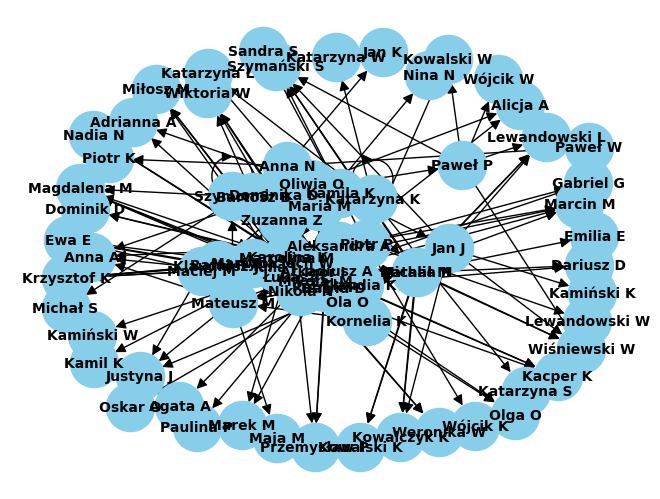

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
   ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
    ("Wojciech W", "Kamil K"),
    ("Wojciech W", "Adrianna A"),
    ("Wojciech W", "Marek M"),
    ("Wojciech W", "Gabriel G"),
    ("Wojciech W", "Julia J"),
    ("Karolina K", "Dominik D"),
    ("Karolina K", "Weronika W"),
    ("Karolina K", "Miłosz M"),
    ("Karolina K", "Nadia N"),
    ("Karolina K", "Kacper K"),
    ("Bartosz B", "Magdalena M"),
    ("Bartosz B", "Mikołaj M"),
    ("Bartosz B", "Wiktoria W"),
    ("Bartosz B", "Piotr P"),
    ("Bartosz B", "Katarzyna K"),
    ("Kamila K", "Jan J"),
    ("Kamila K", "Natalia N"),
    ("Kamila K", "Bartosz B"),
    ("Kamila K", "Sandra S"),
    ("Kamila K", "Dawid D"),
    ("Dawid D", "Emilia E"),
    ("Dawid D", "Szymon S"),
    ("Dawid D", "Karolina K"),
    ("Dawid D", "Oskar O"),
    ("Dawid D", "Klaudia K"),
    ("Dominika D", "Paweł P"),
    ("Dominika D", "Wiktoria W"),
    ("Dominika D", "Igor I"),
    ("Dominika D", "Anna A"),
    ("Dominika D", "Kamila K"),
    ("Patryk P", "Dariusz D"),
    ("Patryk P", "Magdalena M"),
    ("Patryk P", "Przemysław P"),
    ("Patryk P", "Aleksandra A"),
    ("Patryk P", "Mikołaj M"),
    ("Julia J", "Justyna J"),
    ("Julia J", "Marcin M"),
    ("Julia J", "Natalia N"),
    ("Julia J", "Krzysztof K"),
    ("Julia J", "Ewa E"),
    ("Mikołaj M", "Łukasz Ł"),
    ("Mikołaj M", "Martyna M"),
    ("Mikołaj M", "Michał M"),
    ("Mikołaj M", "Klaudia K"),
    ("Mikołaj M", "Mateusz M"),
    ("Ola O", "Julia J"),
    ("Ola O", "Piotr P"),
    ("Ola O", "Olga O"),
    ("Ola O", "Kacper K"),
    ("Ola O", "Magdalena M"),
    ("Maciej M", "Mikołaj M"),
    ("Maciej M", "Justyna J"),
    ("Maciej M", "Katarzyna K"),
    ("Maciej M", "Krzysztof K"),
    ("Maciej M", "Ewa E"),
    ("Nikola N", "Łukasz Ł"),
    ("Nikola N", "Klaudia K"),
    ("Nikola N", "Mateusz M"),
    ("Nikola N", "Julia J"),
    ("Nikola N", "Ola O"),
    ("Zuzanna Z", "Klaudia K"),
    ("Zuzanna Z", "Mateusz M"),
    ("Zuzanna Z", "Piotr P"),
    ("Zuzanna Z", "Wiktoria W"),
    ("Zuzanna Z", "Igor I"),
    ("Łukasz Ł", "Anna A"),
    ("Łukasz Ł", "Kamila K"),
    ("Łukasz Ł", "Dariusz D"),
    ("Łukasz Ł", "Magdalena M"),
    ("Łukasz Ł", "Przemysław P"),
    ("Klaudia K", "Aleksandra A"),
    ("Klaudia K", "Mikołaj M"),
    ("Klaudia K", "Justyna J"),
    ("Klaudia K", "Marcin M"),
    ("Klaudia K", "Natalia N"),
    ("Rafał R", "Krzysztof K"),
    ("Rafał R", "Ewa E"),
    ("Rafał R", "Łukasz Ł"),
    ("Rafał R", "Martyna M"),
    ("Rafał R", "Michał M"),
    ("Kornelia K", "Klaudia K"),
    ("Kornelia K", "Mateusz M"),
    ("Kornelia K", "Julia J"),
    ("Kornelia K", "Piotr P"),
    ("Kornelia K", "Olga O"),
    ("Arkadiusz A", "Natalia N"),
    ("Arkadiusz A", "Paulina P"),
    ("Arkadiusz A", "Wiktoria W"),
    ("Arkadiusz A", "Marek M"),
    ("Arkadiusz A", "Gabriel G"),
    ("Marcelina M", "Julia J"),
    ("Marcelina M", "Dominik D"),
    ("Marcelina M", "Weronika W"),
    ("Marcelina M", "Miłosz M"),
    ("Marcelina M", "Nadia N"),
    ("Marcelina M", "Kacper K"),
    ("Igor I", "Magdalena M"),
    ("Igor I", "Przemysław P"),
    ("Igor I", "Aleksandra A"),
    ("Igor I", "Mikołaj M"),
    ("Igor I", "Marcin M"),
    ("Klaudiusz K", "Natalia N"),
    ("Klaudiusz K", "Krzysztof K"),
    ("Klaudiusz K", "Ewa E"),
    ("Klaudiusz K", "Łukasz Ł"),
    ("Klaudiusz K", "Martyna M"),
    ("Martyna M", "Dominika D"),
    ("Martyna M", "Patryk P"),
    ("Martyna M", "Julia J"),
    ("Martyna M", "Natalia N"),
    ("Martyna M", "Krzysztof K"),
]

G.add_edges_from(edges)

# Obliczanie centralności w stopniu
degree_centrality = nx.degree_centrality(G)

# Obliczanie centralności pośrednictwa
betweenness_centrality = nx.betweenness_centrality(G)

# Obliczanie centralności bliskości
closeness_centrality = nx.closeness_centrality(G)

# Wyświetlanie wyników
print("Centralność w stopniu:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality}")

print("\nCentralność pośrednictwa:")
for node, centrality in betweenness_centrality.items():
    print(f"{node}: {centrality}")

print("\nCentralność bliskości:")
for node, centrality in closeness_centrality.items():
    print(f"{node}: {centrality}")

# Rysowanie grafu
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1200, node_color='skyblue', font_color='black', font_size=10, arrowsize=15)

# Wyświetlanie grafu
plt.show()

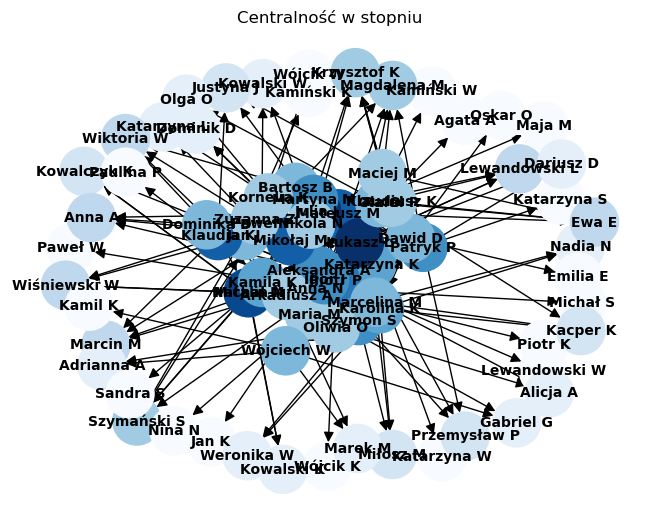

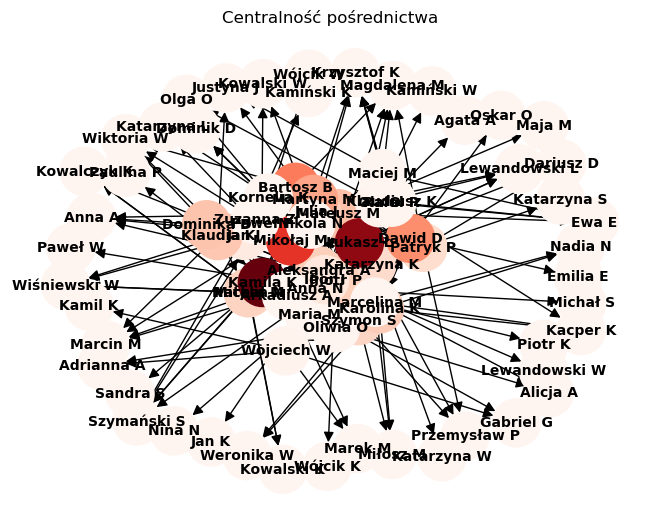

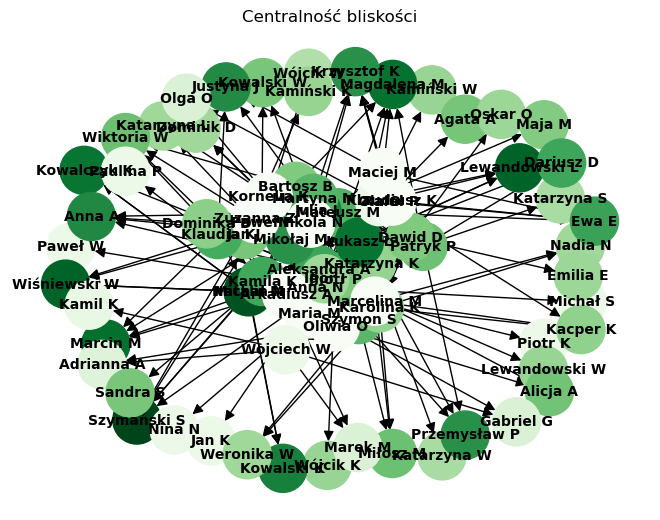

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    
   ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
    ("Wojciech W", "Kamil K"),
    ("Wojciech W", "Adrianna A"),
    ("Wojciech W", "Marek M"),
    ("Wojciech W", "Gabriel G"),
    ("Wojciech W", "Julia J"),
    ("Karolina K", "Dominik D"),
    ("Karolina K", "Weronika W"),
    ("Karolina K", "Miłosz M"),
    ("Karolina K", "Nadia N"),
    ("Karolina K", "Kacper K"),
    ("Bartosz B", "Magdalena M"),
    ("Bartosz B", "Mikołaj M"),
    ("Bartosz B", "Wiktoria W"),
    ("Bartosz B", "Piotr P"),
    ("Bartosz B", "Katarzyna K"),
    ("Kamila K", "Jan J"),
    ("Kamila K", "Natalia N"),
    ("Kamila K", "Bartosz B"),
    ("Kamila K", "Sandra S"),
    ("Kamila K", "Dawid D"),
    ("Dawid D", "Emilia E"),
    ("Dawid D", "Szymon S"),
    ("Dawid D", "Karolina K"),
    ("Dawid D", "Oskar O"),
    ("Dawid D", "Klaudia K"),
    ("Dominika D", "Paweł P"),
    ("Dominika D", "Wiktoria W"),
    ("Dominika D", "Igor I"),
    ("Dominika D", "Anna A"),
    ("Dominika D", "Kamila K"),
    ("Patryk P", "Dariusz D"),
    ("Patryk P", "Magdalena M"),
    ("Patryk P", "Przemysław P"),
    ("Patryk P", "Aleksandra A"),
    ("Patryk P", "Mikołaj M"),
    ("Julia J", "Justyna J"),
    ("Julia J", "Marcin M"),
    ("Julia J", "Natalia N"),
    ("Julia J", "Krzysztof K"),
    ("Julia J", "Ewa E"),
    ("Mikołaj M", "Łukasz Ł"),
    ("Mikołaj M", "Martyna M"),
    ("Mikołaj M", "Michał M"),
    ("Mikołaj M", "Klaudia K"),
    ("Mikołaj M", "Mateusz M"),
    ("Ola O", "Julia J"),
    ("Ola O", "Piotr P"),
    ("Ola O", "Olga O"),
    ("Ola O", "Kacper K"),
    ("Ola O", "Magdalena M"),
    ("Maciej M", "Mikołaj M"),
    ("Maciej M", "Justyna J"),
    ("Maciej M", "Katarzyna K"),
    ("Maciej M", "Krzysztof K"),
    ("Maciej M", "Ewa E"),
    ("Nikola N", "Łukasz Ł"),
    ("Nikola N", "Klaudia K"),
    ("Nikola N", "Mateusz M"),
    ("Nikola N", "Julia J"),
    ("Nikola N", "Ola O"),
    ("Zuzanna Z", "Klaudia K"),
    ("Zuzanna Z", "Mateusz M"),
    ("Zuzanna Z", "Piotr P"),
    ("Zuzanna Z", "Wiktoria W"),
    ("Zuzanna Z", "Igor I"),
    ("Łukasz Ł", "Anna A"),
    ("Łukasz Ł", "Kamila K"),
    ("Łukasz Ł", "Dariusz D"),
    ("Łukasz Ł", "Magdalena M"),
    ("Łukasz Ł", "Przemysław P"),
    ("Klaudia K", "Aleksandra A"),
    ("Klaudia K", "Mikołaj M"),
    ("Klaudia K", "Justyna J"),
    ("Klaudia K", "Marcin M"),
    ("Klaudia K", "Natalia N"),
    ("Rafał R", "Krzysztof K"),
    ("Rafał R", "Ewa E"),
    ("Rafał R", "Łukasz Ł"),
    ("Rafał R", "Martyna M"),
    ("Rafał R", "Michał M"),
    ("Kornelia K", "Klaudia K"),
    ("Kornelia K", "Mateusz M"),
    ("Kornelia K", "Julia J"),
    ("Kornelia K", "Piotr P"),
    ("Kornelia K", "Olga O"),
    ("Arkadiusz A", "Natalia N"),
    ("Arkadiusz A", "Paulina P"),
    ("Arkadiusz A", "Wiktoria W"),
    ("Arkadiusz A", "Marek M"),
    ("Arkadiusz A", "Gabriel G"),
    ("Marcelina M", "Julia J"),
    ("Marcelina M", "Dominik D"),
    ("Marcelina M", "Weronika W"),
    ("Marcelina M", "Miłosz M"),
    ("Marcelina M", "Nadia N"),
    ("Marcelina M", "Kacper K"),
    ("Igor I", "Magdalena M"),
    ("Igor I", "Przemysław P"),
    ("Igor I", "Aleksandra A"),
    ("Igor I", "Mikołaj M"),
    ("Igor I", "Marcin M"),
    ("Klaudiusz K", "Natalia N"),
    ("Klaudiusz K", "Krzysztof K"),
    ("Klaudiusz K", "Ewa E"),
    ("Klaudiusz K", "Łukasz Ł"),
    ("Klaudiusz K", "Martyna M"),
    ("Martyna M", "Dominika D"),
    ("Martyna M", "Patryk P"),
    ("Martyna M", "Julia J"),
    ("Martyna M", "Natalia N"),
    ("Martyna M", "Krzysztof K"),

]

G.add_edges_from(edges)

# Obliczanie centralności w stopniu
degree_centrality = nx.degree_centrality(G)

# Obliczanie centralności pośrednictwa
betweenness_centrality = nx.betweenness_centrality(G)

# Obliczanie centralności bliskości
closeness_centrality = nx.closeness_centrality(G)

# Rysowanie grafu z oznaczeniem centralności kolorami
pos = nx.spring_layout(G)

# Centralność w stopniu
node_colors_degree = [degree_centrality[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1200, node_color=node_colors_degree, cmap=plt.cm.Blues, font_color='black', font_size=10, arrowsize=15)
plt.title("Centralność w stopniu")
plt.show()

# Centralność pośrednictwa
node_colors_betweenness = [betweenness_centrality[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1200, node_color=node_colors_betweenness, cmap=plt.cm.Reds, font_color='black', font_size=10, arrowsize=15)
plt.title("Centralność pośrednictwa")
plt.show()

# Centralność bliskości
node_colors_closeness = [closeness_centrality[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1200, node_color=node_colors_closeness, cmap=plt.cm.Greens, font_color='black', font_size=10, arrowsize=15)
plt.title("Centralność bliskości")
plt.show()

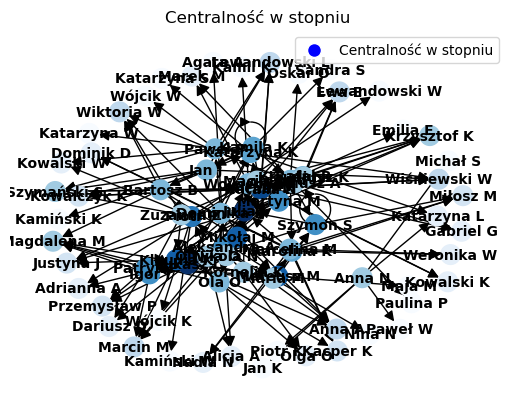

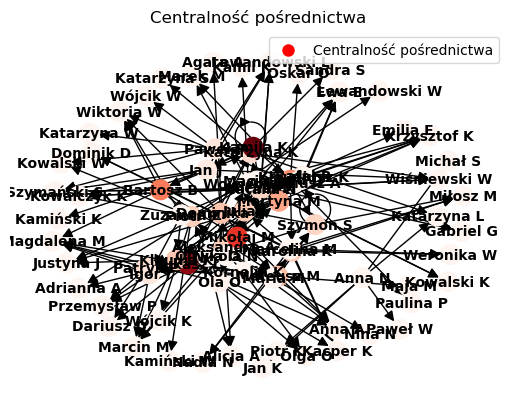

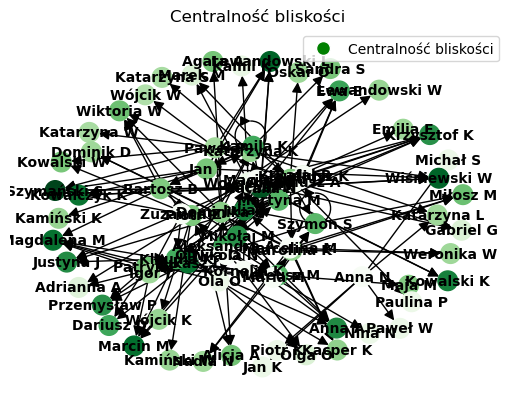

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
     
   ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
    ("Wojciech W", "Kamil K"),
    ("Wojciech W", "Adrianna A"),
    ("Wojciech W", "Marek M"),
    ("Wojciech W", "Gabriel G"),
    ("Wojciech W", "Julia J"),
    ("Karolina K", "Dominik D"),
    ("Karolina K", "Weronika W"),
    ("Karolina K", "Miłosz M"),
    ("Karolina K", "Nadia N"),
    ("Karolina K", "Kacper K"),
    ("Bartosz B", "Magdalena M"),
    ("Bartosz B", "Mikołaj M"),
    ("Bartosz B", "Wiktoria W"),
    ("Bartosz B", "Piotr P"),
    ("Bartosz B", "Katarzyna K"),
    ("Kamila K", "Jan J"),
    ("Kamila K", "Natalia N"),
    ("Kamila K", "Bartosz B"),
    ("Kamila K", "Sandra S"),
    ("Kamila K", "Dawid D"),
    ("Dawid D", "Emilia E"),
    ("Dawid D", "Szymon S"),
    ("Dawid D", "Karolina K"),
    ("Dawid D", "Oskar O"),
    ("Dawid D", "Klaudia K"),
    ("Dominika D", "Paweł P"),
    ("Dominika D", "Wiktoria W"),
    ("Dominika D", "Igor I"),
    ("Dominika D", "Anna A"),
    ("Dominika D", "Kamila K"),
    ("Patryk P", "Dariusz D"),
    ("Patryk P", "Magdalena M"),
    ("Patryk P", "Przemysław P"),
    ("Patryk P", "Aleksandra A"),
    ("Patryk P", "Mikołaj M"),
    ("Julia J", "Justyna J"),
    ("Julia J", "Marcin M"),
    ("Julia J", "Natalia N"),
    ("Julia J", "Krzysztof K"),
    ("Julia J", "Ewa E"),
    ("Mikołaj M", "Łukasz Ł"),
    ("Mikołaj M", "Martyna M"),
    ("Mikołaj M", "Michał M"),
    ("Mikołaj M", "Klaudia K"),
    ("Mikołaj M", "Mateusz M"),
    ("Ola O", "Julia J"),
    ("Ola O", "Piotr P"),
    ("Ola O", "Olga O"),
    ("Ola O", "Kacper K"),
    ("Ola O", "Magdalena M"),
    ("Maciej M", "Mikołaj M"),
    ("Maciej M", "Justyna J"),
    ("Maciej M", "Katarzyna K"),
    ("Maciej M", "Krzysztof K"),
    ("Maciej M", "Ewa E"),
    ("Nikola N", "Łukasz Ł"),
    ("Nikola N", "Klaudia K"),
    ("Nikola N", "Mateusz M"),
    ("Nikola N", "Julia J"),
    ("Nikola N", "Ola O"),
    ("Zuzanna Z", "Klaudia K"),
    ("Zuzanna Z", "Mateusz M"),
    ("Zuzanna Z", "Piotr P"),
    ("Zuzanna Z", "Wiktoria W"),
    ("Zuzanna Z", "Igor I"),
    ("Łukasz Ł", "Anna A"),
    ("Łukasz Ł", "Kamila K"),
    ("Łukasz Ł", "Dariusz D"),
    ("Łukasz Ł", "Magdalena M"),
    ("Łukasz Ł", "Przemysław P"),
    ("Klaudia K", "Aleksandra A"),
    ("Klaudia K", "Mikołaj M"),
    ("Klaudia K", "Justyna J"),
    ("Klaudia K", "Marcin M"),
    ("Klaudia K", "Natalia N"),
    ("Rafał R", "Krzysztof K"),
    ("Rafał R", "Ewa E"),
    ("Rafał R", "Łukasz Ł"),
    ("Rafał R", "Martyna M"),
    ("Rafał R", "Michał M"),
    ("Kornelia K", "Klaudia K"),
    ("Kornelia K", "Mateusz M"),
    ("Kornelia K", "Julia J"),
    ("Kornelia K", "Piotr P"),
    ("Kornelia K", "Olga O"),
    ("Arkadiusz A", "Natalia N"),
    ("Arkadiusz A", "Paulina P"),
    ("Arkadiusz A", "Wiktoria W"),
    ("Arkadiusz A", "Marek M"),
    ("Arkadiusz A", "Gabriel G"),
    ("Marcelina M", "Julia J"),
    ("Marcelina M", "Dominik D"),
    ("Marcelina M", "Weronika W"),
    ("Marcelina M", "Miłosz M"),
    ("Marcelina M", "Nadia N"),
    ("Marcelina M", "Kacper K"),
    ("Igor I", "Magdalena M"),
    ("Igor I", "Przemysław P"),
    ("Igor I", "Aleksandra A"),
    ("Igor I", "Mikołaj M"),
    ("Igor I", "Marcin M"),
    ("Klaudiusz K", "Natalia N"),
    ("Klaudiusz K", "Krzysztof K"),
    ("Klaudiusz K", "Ewa E"),
    ("Klaudiusz K", "Łukasz Ł"),
    ("Klaudiusz K", "Martyna M"),
    ("Martyna M", "Dominika D"),
    ("Martyna M", "Patryk P"),
    ("Martyna M", "Julia J"),
    ("Martyna M", "Natalia N"),
    ("Martyna M", "Krzysztof K"),
]

G.add_edges_from(edges)

# Obliczanie centralności w stopniu
degree_centrality = nx.degree_centrality(G)

# Obliczanie centralności pośrednictwa
betweenness_centrality = nx.betweenness_centrality(G)

# Obliczanie centralności bliskości
closeness_centrality = nx.closeness_centrality(G)

# Rysowanie grafu z oznaczeniem centralności kolorami
pos = nx.spring_layout(G)

# Centralność w stopniu
node_colors_degree = [degree_centrality[node] for node in G.nodes]
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors_degree, cmap=plt.cm.Blues, font_color='black', font_size=10, arrowsize=15, ax=ax)
ax.set_title("Centralność w stopniu")

# Dodaj legendę
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Centralność w stopniu')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

# Centralność pośrednictwa
node_colors_betweenness = [betweenness_centrality[node] for node in G.nodes]
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors_betweenness, cmap=plt.cm.Reds, font_color='black', font_size=10, arrowsize=15, ax=ax)
ax.set_title("Centralność pośrednictwa")

# Dodaj legendę
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Centralność pośrednictwa')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

# Centralność bliskości
node_colors_closeness = [closeness_centrality[node] for node in G.nodes]
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors_closeness, cmap=plt.cm.Greens, font_color='black', font_size=10, arrowsize=15, ax=ax)
ax.set_title("Centralność bliskości")

# Dodaj legendę
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Centralność bliskości')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

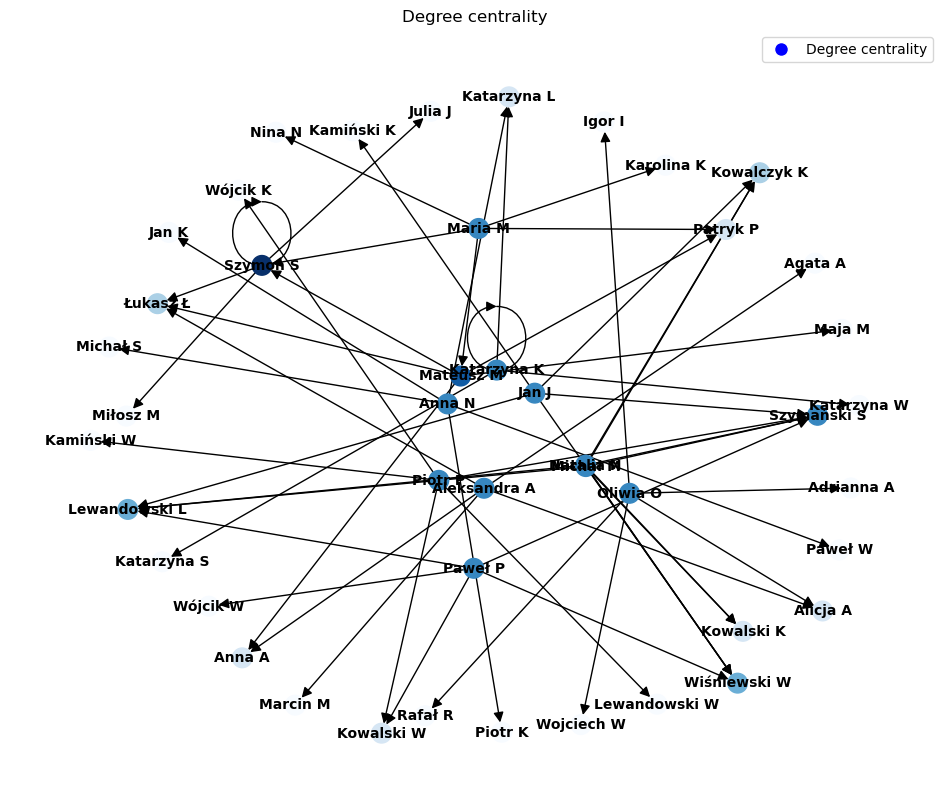

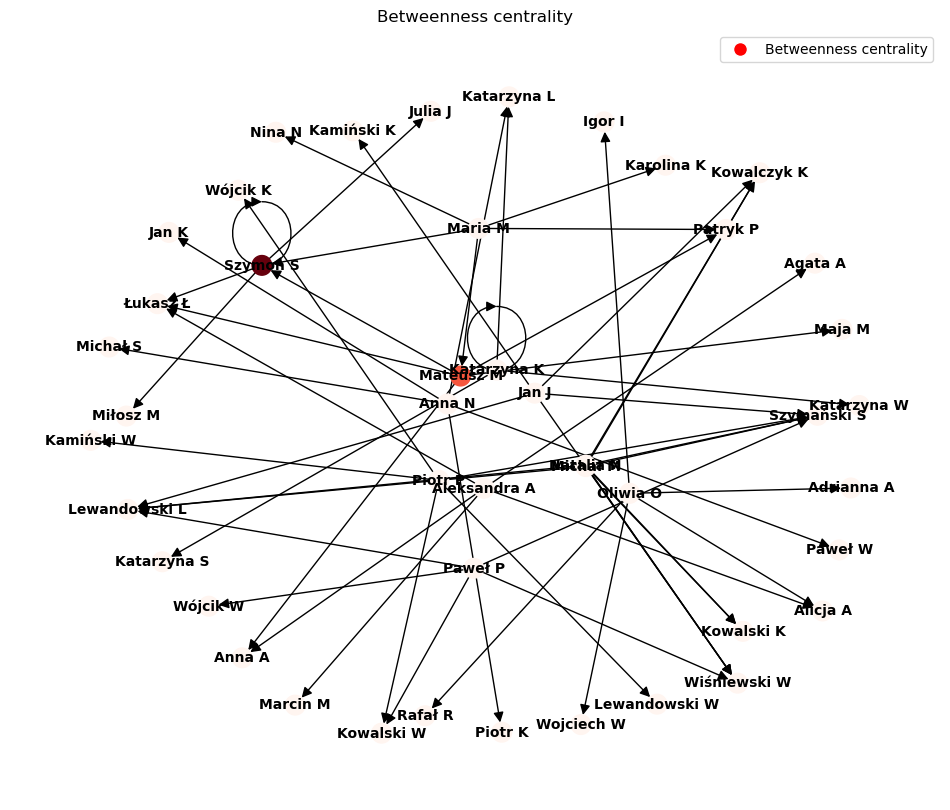

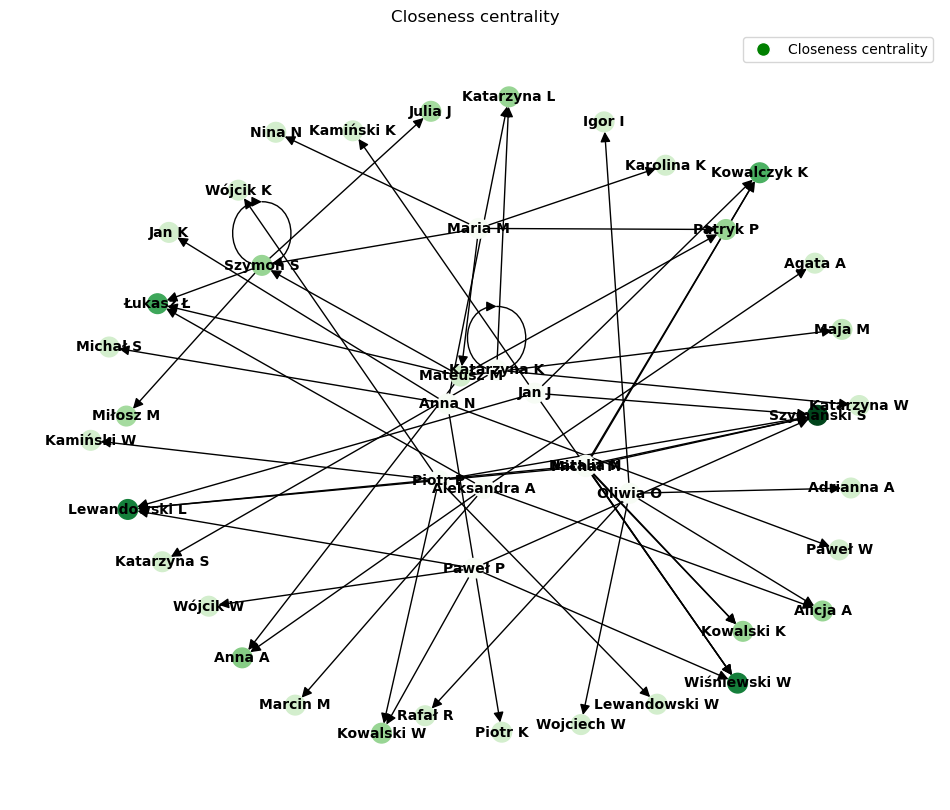

In [143]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
 ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

G.add_edges_from(edges)

# Obliczanie centralności w stopniu
degree_centrality = nx.degree_centrality(G)

# Obliczanie centralności pośrednictwa
betweenness_centrality = nx.betweenness_centrality(G)

# Obliczanie centralności bliskości
closeness_centrality = nx.closeness_centrality(G)

# Rysowanie grafu z oznaczeniem centralności kolorami
pos = nx.spring_layout(G)

# Centralność w stopniu
node_colors_degree = [degree_centrality[node] for node in G.nodes]
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors_degree, cmap=plt.cm.Blues, font_color='black', font_size=10, arrowsize=15, ax=ax)
ax.set_title("Degree centrality")

# Dodaj legendę
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Degree centrality')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

# Centralność pośrednictwa
node_colors_betweenness = [betweenness_centrality[node] for node in G.nodes]
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors_betweenness, cmap=plt.cm.Reds, font_color='black', font_size=10, arrowsize=15, ax=ax)
ax.set_title("Betweenness centrality")

# Dodaj legendę
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Betweenness centrality')]
ax.legend(handles=legend_elements, loc='upper right')


plt.show()

# Centralność bliskości
node_colors_closeness = [closeness_centrality[node] for node in G.nodes]
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors_closeness, cmap=plt.cm.Greens, font_color='black', font_size=10, arrowsize=15, ax=ax)
ax.set_title("Closeness centrality")

# Dodaj legendę
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Closeness centrality')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

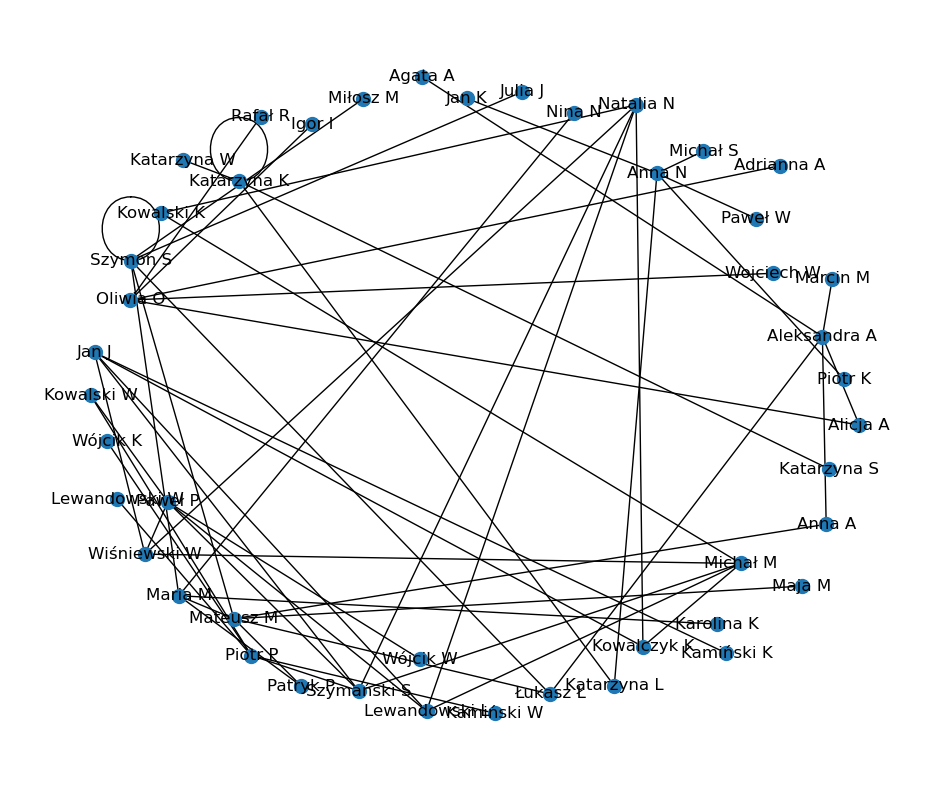

Entropy: 5.84


In [147]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import math

# Dane z wcześniejszych połączeń
connections = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu
G = nx.Graph()
G.add_edges_from(connections)

# Rysowanie grafu
pos = nx.spring_layout(G, k=3.0)
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw(G, pos, with_labels=True,node_size=100)
plt.show()

# Funkcja do obliczania entropii
def calculate_entropy(connections):
    total_connections = len(connections)
    user_pairs = [f"{user1} - {user2}" for user1, user2 in connections]
    counter = Counter(user_pairs)
    probabilities = [count / total_connections for count in counter.values()]
    entropy = -sum(p * math.log2(p) for p in probabilities)
    return entropy

# Oblicz entropię dla danych
entropy_value = calculate_entropy(connections)
print(f'Entropy: {entropy_value:.2f}')

In [79]:
import networkx as nx

# Dane wcześniejszych połączeń
connections = [
      ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu skierowanego
G = nx.DiGraph()
G.add_edges_from(connections)

# Obliczenie node redundancy
original_nodes = len(G.nodes)
minimum_nodes = nx.node_connectivity(G)

node_redundancy = original_nodes - minimum_nodes

print(f"Node Redundancy: {node_redundancy}")

Node Redundancy: 45


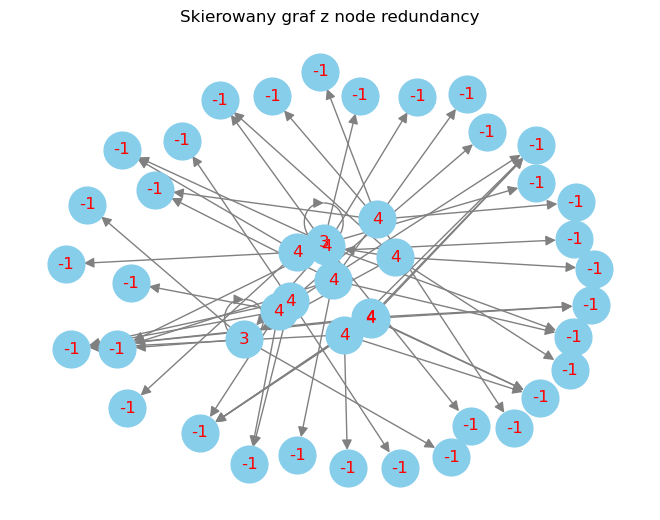

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

# Dane wcześniejszych połączeń
connections = [
  ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu skierowanego
G = nx.DiGraph()
G.add_edges_from(connections)

# Rysowanie grafu
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=700, node_color='skyblue', edge_color='gray', arrowsize=15)

# Wizualizacja node redundancy jako etykiet na węzłach
node_redundancy_labels = {node: G.out_degree(node) - 1 for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_redundancy_labels, font_color='red')

plt.title('Skierowany graf z node redundancy')
plt.show()

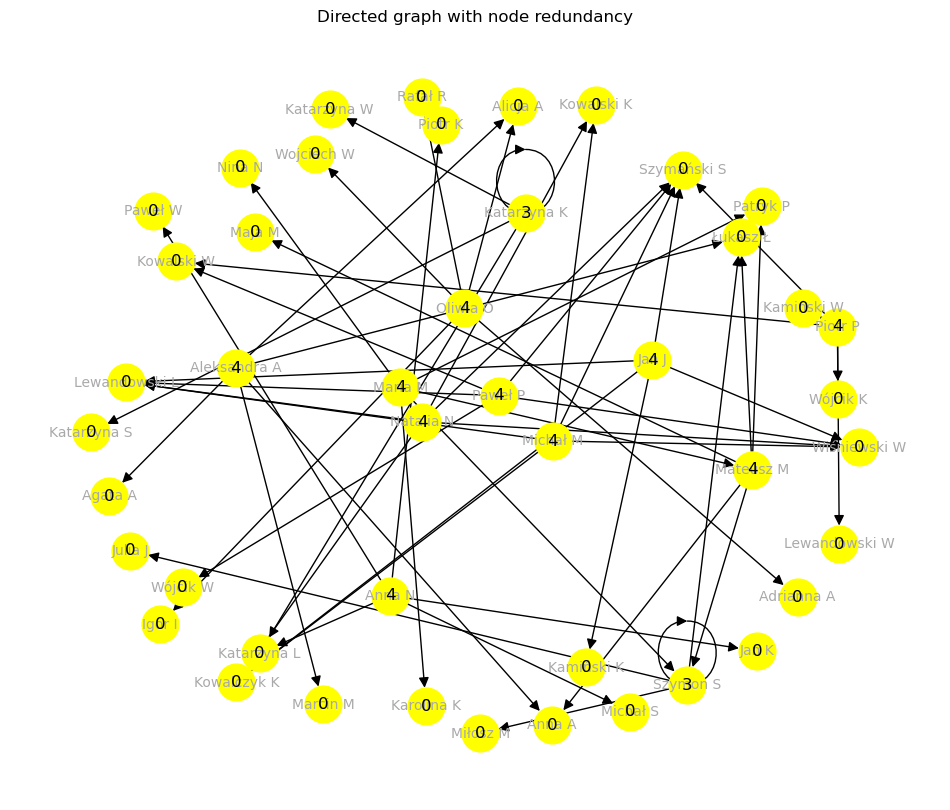

In [173]:
import networkx as nx
import matplotlib.pyplot as plt

# Dane wcześniejszych połączeń
connections = [
     ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu skierowanego
G = nx.DiGraph()
G.add_edges_from(connections)

# Rysowanie grafu
pos = nx.spring_layout(G, k=1.5)
fig = plt.subplots(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=10, font_color='darkgray',node_color='yellow', edge_color='black', arrowsize=15)

# Wizualizacja node redundancy jako etykiet na węzłach
node_redundancy_labels = {node: max(0, G.out_degree(node) - 1) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_redundancy_labels, font_color='black')

plt.title('Directed graph with node redundancy')
plt.show()

In [85]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [86]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Dane wcześniejszych połączeń
connections = [
  ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu skierowanego
G = nx.DiGraph()
G.add_edges_from(connections)

# Algorytm Louvain
partition = community_louvain.best_partition(G)

# Rysowanie grafu z podziałem na społeczności
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray', arrowsize=15)

plt.title('Podział na społeczności z algorytmem Louvain')
plt.show()

TypeError: Bad graph type, use only non directed graph

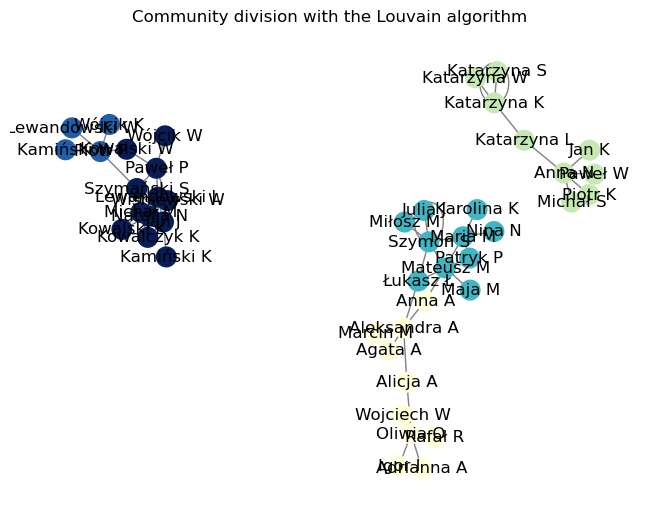

In [174]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Dane wcześniejszych połączeń
connections = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Algorytm Louvain
partition = community_louvain.best_partition(G)

# Rysowanie grafu z podziałem na społeczności
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True,  node_size=200, node_color=colors, cmap=plt.cm.get_cmap('YlGnBu'), edge_color='gray')

plt.title('Community division with the Louvain algorithm')
plt.show()

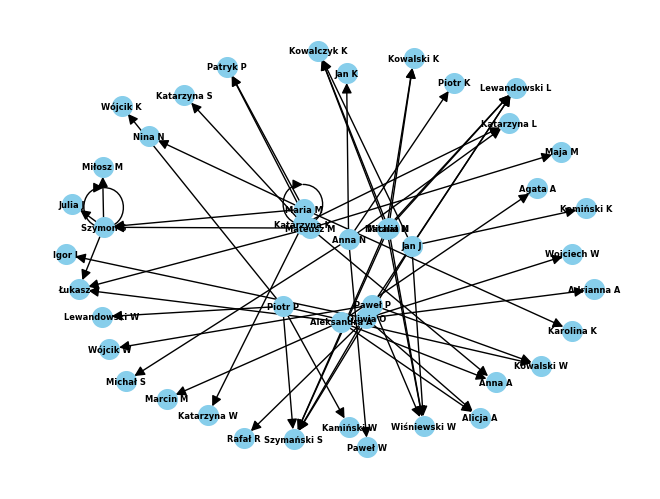

Średni współczynnik klastrowania dla całego grafu: 0.02


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

G.add_edges_from(edges)

# Obliczanie współczynnika klastrowania dla całego grafu
clustering_coefficient = nx.average_clustering(G)

# Rysowanie grafu z większymi wierzchołkami
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', font_color='black', font_size=6, arrowsize=15)

# Wyświetlanie grafu
plt.show()

# Wyświetlanie współczynnika klastrowania dla całego grafu
print(f'Średni współczynnik klastrowania dla całego grafu: {clustering_coefficient:.2f}')

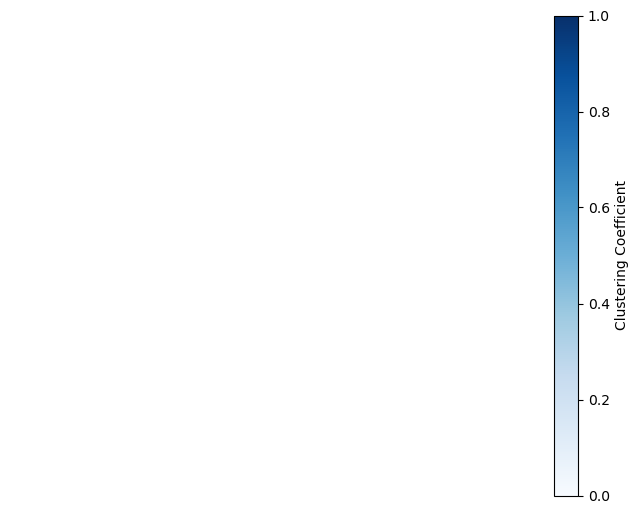

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    # ... (jak wcześniej)
]

G.add_edges_from(edges)

# Obliczanie współczynnika klastrowania dla każdego wierzchołka
clustering_coefficients = nx.clustering(G)

# Rysowanie grafu z różnymi kolorami w zależności od współczynnika klastrowania
pos = nx.spring_layout(G)
node_colors = [clustering_coefficients[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors, cmap=plt.cm.Blues, font_color='black', font_size=6, arrowsize=15)

# Dodanie kolorowej skali do grafu
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Clustering Coefficient')

# Wyświetlanie grafu
plt.show()

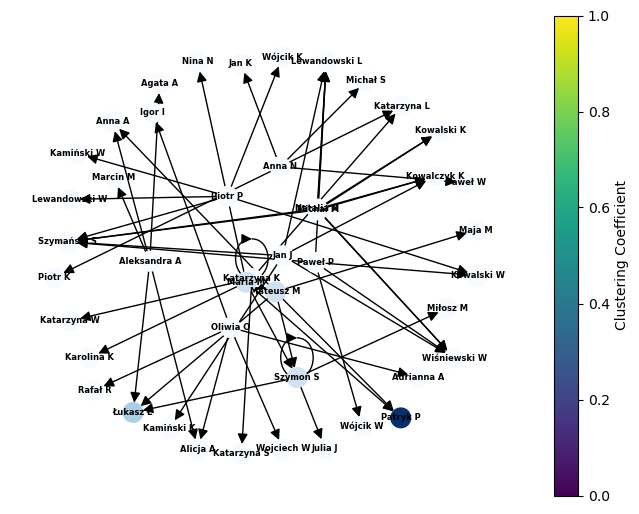

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

G.add_edges_from(edges)

# Obliczanie współczynnika klastrowania dla każdego wierzchołka
clustering_coefficients = nx.clustering(G)

# Rysowanie grafu z różnymi kolorami w zależności od współczynnika klastrowania
pos = nx.spring_layout(G)
node_colors = [clustering_coefficients[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors, cmap=plt.cm.Blues, font_color='black', font_size=6, arrowsize=15)

# Dodanie kolorowej skali do grafu
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Clustering Coefficient')

# Wyświetlanie grafu
plt.show()

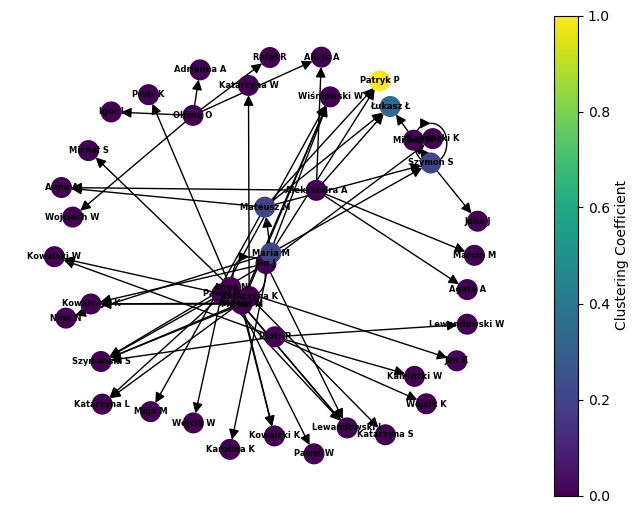

In [106]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
 ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

G.add_edges_from(edges)

# Obliczanie współczynnika klastrowania dla każdego wierzchołka
clustering_coefficients = nx.clustering(G)

# Rysowanie grafu z różnymi kolorami w zależności od współczynnika klastrowania
pos = nx.spring_layout(G)
node_colors = [clustering_coefficients[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors, cmap=plt.cm.viridis, font_color='black', font_size=6, arrowsize=15)

# Dodanie kolorowej skali do grafu
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Clustering Coefficient')

# Wyświetlanie grafu
plt.show()

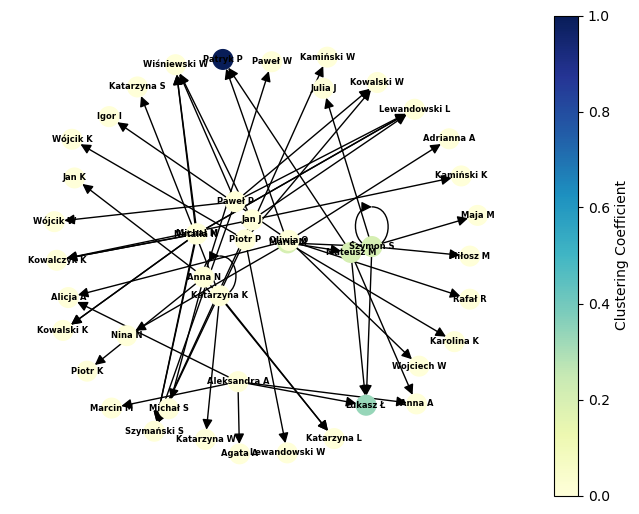

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

# Tworzenie skierowanego grafu
G = nx.DiGraph()

# Dodawanie krawędzi z wcześniejszych połączeń
edges = [
("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

G.add_edges_from(edges)

# Obliczanie współczynnika klastrowania dla każdego wierzchołka
clustering_coefficients = nx.clustering(G)

# Rysowanie grafu z różnymi kolorami w zależności od współczynnika klastrowania
pos = nx.spring_layout(G)
node_colors = [clustering_coefficients[node] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color=node_colors, cmap=plt.cm.YlGnBu, font_color='black', font_size=6, arrowsize=15)

# Dodanie kolorowej skali do grafu
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlGnBu)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Clustering Coefficient')

# Wyświetlanie grafu
plt.show()

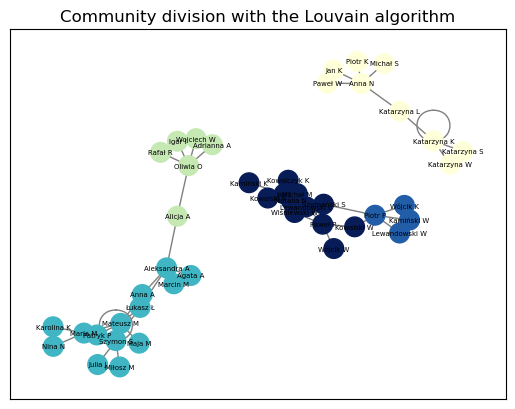

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Dane wcześniejszych połączeń
connections = [
  ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Algorytm Louvain
partition = community_louvain.best_partition(G)

# Rysowanie grafu z podziałem na społeczności
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]

# Rysowanie wierzchołków
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.get_cmap('YlGnBu'), node_size=200)

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dodanie etykiet wierzchołków nad wierzchołkami
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes},  font_size=5, font_color='black')

plt.title('Community division with the Louvain algorithm')
plt.show()

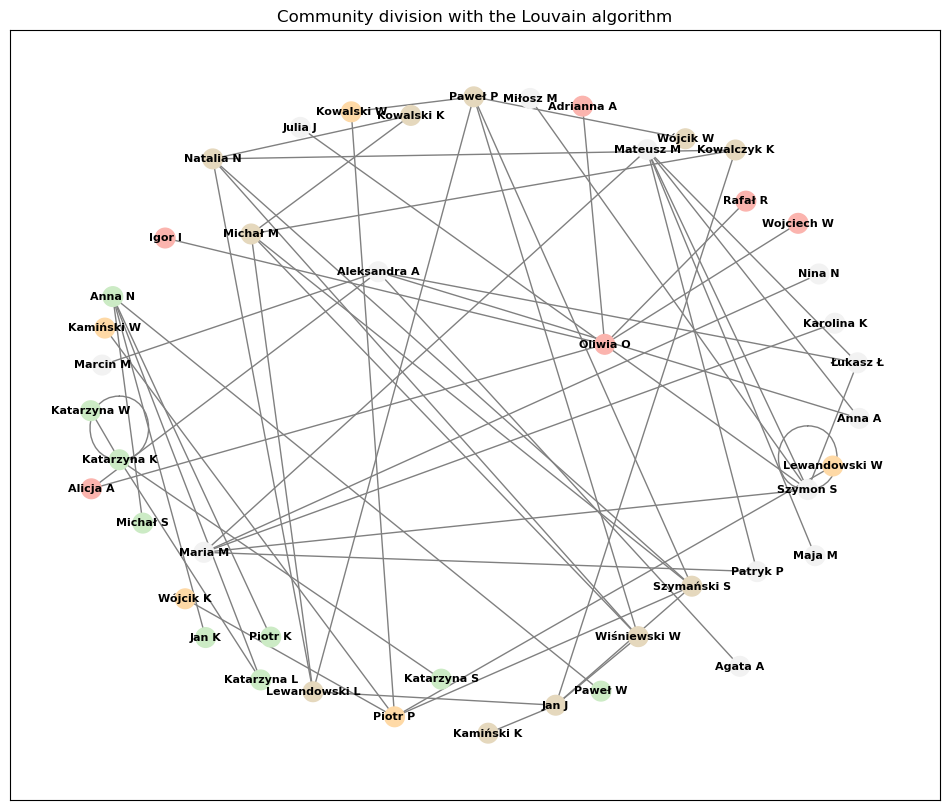

In [130]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Dane wcześniejszych połączeń
connections = [
     ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Algorytm Louvain
partition = community_louvain.best_partition(G)

# Rysowanie grafu z podziałem na społeczności
pos = nx.spring_layout(G, k=2.1)  # Dostosuj parametr k według potrzeb
colors = [partition[node] for node in G.nodes]
fig, ax = plt.subplots(figsize=(12, 10))

# Rysowanie wierzchołków
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.get_cmap('Pastel1'), node_size=200)

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dodanie etykiet wierzchołków nad wierzchołkami
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, font_size=8, font_color='black', font_weight='bold')

plt.title('Community division with the Louvain algorithm')
plt.show()

In [42]:
import networkx as nx

# Dane wcześniejszych połączeń
connections = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Obliczanie średniego stopnia wierzchołka
N = len(G.nodes)
M = len(G.edges)
average_degree = (2 * M) / N

print(f"Average degree of a vertex: {average_degree}")

Average degree of a vertex: 2.577777777777778


In [43]:
import networkx as nx

# Dane wcześniejszych połączeń
connections = [
 ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Obliczanie średnicy sieci
diameter = nx.diameter(G)

print(f"Network diameter: {diameter}")

NetworkXError: Found infinite path length because the graph is not connected

In [44]:
import networkx as nx

# Dane wcześniejszych połączeń
connections = [
   ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Sprawdź czy graf jest spójny
if nx.is_connected(G):
    # Jeśli jest spójny, oblicz średnicę sieci
    diameter = nx.diameter(G)
    print(f"Network diameter: {diameter}")
else:
    print("Graph is not connected, diameter is infinite.")

Graph is not connected, diameter is infinite.


In [71]:
nx.average_node_connectivity(graph, flow_func=None)

0.47342995169082125

Average node connectivity: 0.03383838383838384


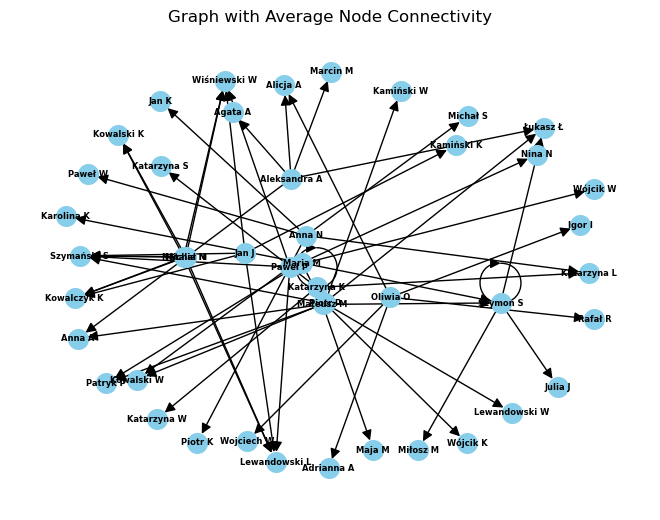

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Dane wcześniejszych połączeń
connections = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")

]

# Tworzenie grafu skierowanego
G = nx.DiGraph()
G.add_edges_from(connections)

# Oblicz średnią zdolność łączności węzłów
average_connectivity = nx.average_node_connectivity(G)
print(f"Average node connectivity: {average_connectivity}")

# Rysuj graf
pos = nx.spring_layout(G, seed=42)  # Seed dla reprodukowalności układu wierzchołków
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', font_color='black', font_size=6, arrowsize=15)

plt.title('Graph with Average Node Connectivity')
plt.show()

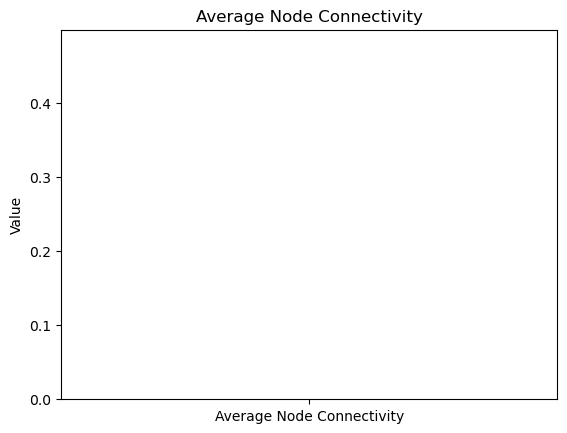

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

# Dane wcześniejszych połączeń
connections = [
   ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A")

]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Obliczanie średniego stopnia wierzchołka
average_node_connectivity = nx.average_node_connectivity(G)

# Rysowanie wykresu
plt.bar(['Average Node Connectivity'], [average_node_connectivity], color='white')
plt.title('Average Node Connectivity')
plt.ylabel('Value')
plt.show()

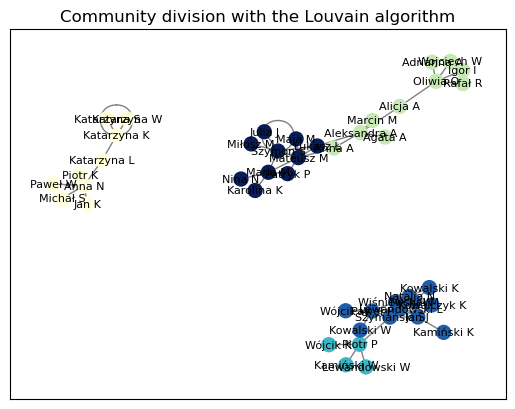

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Dane wcześniejszych połączeń
connections = [
    ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Algorytm Louvain
partition = community_louvain.best_partition(G)

# Rysowanie grafu z podziałem na społeczności
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]

# Rysowanie wierzchołków z dostosowanym rozmiarem
node_size = 100  # Dostosuj według potrzeb
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.get_cmap('YlGnBu'), node_size=node_size)

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dodanie etykiet wierzchołków nad wierzchołkami
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, font_size=8, font_color='black')

plt.title('Community division with the Louvain algorithm')
plt.show()

In [8]:
import numpy as np

# Lista wierzchołków
vertices = ["Anna N", "Katarzyna L", "Piotr K", "Paweł W", "Michał S", "Jan K", "Katarzyna W", "Katarzyna S", "Piotr P", "Lewandowski W", "Kowalski W", "Kamiński W", "Szymański S", "Wójcik K", "Wiśniewski W", "Kowalski W", "Wójcik W","Katarzyna K", "Lewandowski L", "Michał M", "Lewandowski L", "Kowalczyk K", "Szymański S", "Kowalski K", "Jan J", "Wiśniewski W", "Kamiński K", "Szymański S", "Kowalczyk K", "Natalia N", "Kowalski K", "Wiśniewski W", "Szymański S", "Kowalczyk K", "Łukasz Ł", "Szymon S", "Patryk P", "Anna A", "Maja M", "Łukasz Ł", "Anna A", "Agata A", "Alicja A", "Marcin M", "Karolina K", "Mateusz M", "Szymon S", "Nina N", "Patryk P", "Julia J", "Szymon S", "Miłosz M", "Łukasz Ł", "Łukasz Ł", "Adrianna A", "Wojciech W", "Igor I", "Rafał R", "Alicja A"]

# Lista krawędzi
edges = [
     ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie macierzy sąsiedztwa
num_vertices = len(vertices)
adjacency_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

for edge in edges:
    idx1 = vertices.index(edge[0])
    idx2 = vertices.index(edge[1])
    adjacency_matrix[idx1, idx2] = 1
    adjacency_matrix[idx2, idx1] = 1

# Wyświetlanie macierzy sąsiedztwa
print("Adjacency Matrix:")
print(adjacency_matrix)

ValueError: 'Paweł P' is not in list

In [9]:
import numpy as np

# Lista wierzchołków
vertices = ["Anna N", "Katarzyna L", "Piotr K", "Paweł W", "Michał S", "Jan K", "Katarzyna W", "Katarzyna S", "Piotr P", "Lewandowski W", "Kowalski W", "Kamiński W", "Szymański S", "Wójcik K", "Wiśniewski W", "Kowalski W", "Wójcik W", "Lewandowski L", "Michał M", "Lewandowski L", "Kowalczyk K", "Szymański S", "Kowalski K", "Jan J", "Wiśniewski W", "Kamiński K", "Szymański S", "Kowalczyk K", "Natalia N", "Kowalski K", "Wiśniewski W", "Szymański S", "Kowalczyk K", "Łukasz Ł", "Szymon S", "Patryk P", "Anna A", "Maja M", "Aleksandra A", "Łukasz Ł", "Anna A", "Agata A", "Alicja A", "Marcin M", "Karolina K", "Mateusz M", "Szymon S", "Nina N", "Patryk P", "Julia J", "Szymon S", "Miłosz M", "Łukasz Ł", "Łukasz Ł", "Adrianna A", "Wojciech W", "Igor I", "Rafał R", "Alicja A"]

# Lista krawędzi
edges = [
       ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie macierzy sąsiedztwa
num_vertices = len(vertices)
adjacency_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

for edge in edges:
    if edge[0] in vertices and edge[1] in vertices:
        idx1 = vertices.index(edge[0])
        idx2 = vertices.index(edge[1])
        adjacency_matrix[idx1, idx2] = 1
        adjacency_matrix[idx2, idx1] = 1

# Wyświetlanie macierzy sąsiedztwa
print("Adjacency Matrix:")
print(adjacency_matrix)

Adjacency Matrix:
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


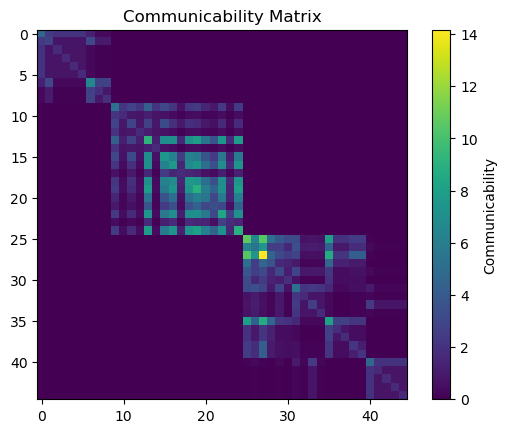

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Wizualizacja macierzy komunikowalności
communicability_matrix = nx.communicability(G)
communicability_array = np.array([[value for value in row.values()] for row in communicability_matrix.values()])

plt.imshow(communicability_array, cmap='viridis')
plt.colorbar(label="Communicability")
plt.title("Communicability Matrix")
plt.show()

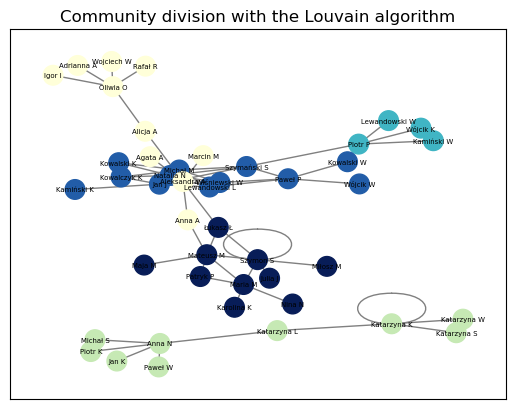

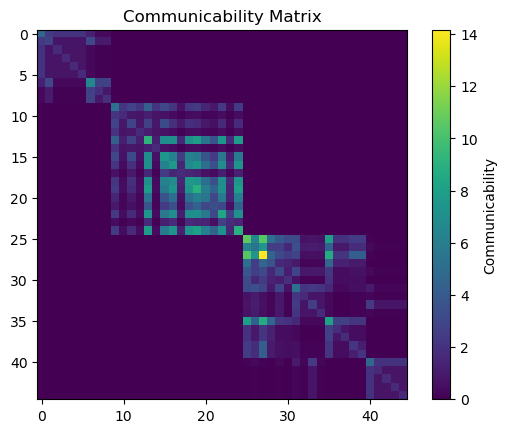

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from community import community_louvain

# Dane wcześniejszych połączeń
connections = [
      ("Anna N", "Katarzyna L"),
    ("Anna N", "Piotr K"),
    ("Anna N", "Paweł W"),
    ("Anna N", "Michał S"),
    ("Anna N", "Jan K"),
    ("Katarzyna K", "Katarzyna W"),
    ("Katarzyna K", "Katarzyna L"),
    ("Katarzyna K", "Katarzyna K"),
    ("Katarzyna K", "Katarzyna S"),
    ("Katarzyna K", "Katarzyna K"),
    ("Piotr P", "Lewandowski W"),
    ("Piotr P", "Kowalski W"),
    ("Piotr P", "Kamiński W"),
    ("Piotr P", "Szymański S"),
    ("Piotr P", "Wójcik K"),
    ("Paweł P", "Wiśniewski W"),
    ("Paweł P", "Kowalski W"),
    ("Paweł P", "Wójcik W"),
    ("Paweł P", "Szymański S"),
    ("Paweł P", "Lewandowski L"),
    ("Michał M", "Wiśniewski W"),
    ("Michał M", "Lewandowski L"),
    ("Michał M", "Kowalczyk K"),
    ("Michał M", "Szymański S"),
    ("Michał M", "Kowalski K"),
    ("Jan J", "Lewandowski L"),
    ("Jan J", "Wiśniewski W"),
    ("Jan J", "Kamiński K"),
    ("Jan J", "Szymański S"),
    ("Jan J", "Kowalczyk K"),
    ("Natalia N", "Lewandowski L"),
    ("Natalia N", "Kowalski K"),
    ("Natalia N", "Wiśniewski W"),
    ("Natalia N", "Szymański S"),
    ("Natalia N", "Kowalczyk K"),
    ("Mateusz M", "Łukasz Ł"),
    ("Mateusz M", "Szymon S"),
    ("Mateusz M", "Patryk P"),
    ("Mateusz M", "Anna A"),
    ("Mateusz M", "Maja M"),
    ("Aleksandra A", "Łukasz Ł"),
    ("Aleksandra A", "Anna A"),
    ("Aleksandra A", "Agata A"),
    ("Aleksandra A", "Alicja A"),
    ("Aleksandra A", "Marcin M"),
    ("Maria M", "Karolina K"),
    ("Maria M", "Mateusz M"),
    ("Maria M", "Szymon S"),
    ("Maria M", "Nina N"),
    ("Maria M", "Patryk P"),
    ("Szymon S", "Julia J"),
    ("Szymon S", "Szymon S"),
    ("Szymon S", "Miłosz M"),
    ("Szymon S", "Łukasz Ł"),
    ("Szymon S", "Łukasz Ł"),
    ("Oliwia O", "Adrianna A"),
    ("Oliwia O", "Wojciech W"),
    ("Oliwia O", "Igor I"),
    ("Oliwia O", "Rafał R"),
    ("Oliwia O", "Alicja A"),
]

# Tworzenie grafu nieskierowanego
G = nx.Graph()
G.add_edges_from(connections)

# Algorytm Louvain
partition = community_louvain.best_partition(G)

# Rysowanie grafu z podziałem na społeczności
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]

# Rysowanie wierzchołków
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.get_cmap('YlGnBu'), node_size=200)

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dodanie etykiet wierzchołków nad wierzchołkami
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, font_size=5, font_color='black')

plt.title('Community division with the Louvain algorithm')
plt.show()

# Wizualizacja macierzy komunikowalności
communicability_matrix = nx.communicability(G)
communicability_array = np.array([[value for value in row.values()] for row in communicability_matrix.values()])

plt.imshow(communicability_array, cmap='viridis')
plt.colorbar(label="Communicability")
plt.title("Communicability Matrix")
plt.show()